# Exploratory Data Analysis - Customer Loans in Finance



## Setting Up

Import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import seaborn as sns
from scipy.stats import normaltest

Import data processing classes

In [2]:
from datatransform import DataTransform
from dataframeinfo import DataFrameInfo
from dataframetransform import DataFrameTransform
from plotter import Plotter

Convert imported csv file to a pandas dataframe

In [3]:
df = pd.read_csv('loan_payments.csv', low_memory=False, index_col =0)

Create instances of the classes

In [4]:
datatransform = DataTransform(df)
datainfo = DataFrameInfo(df)
dftransform = DataFrameTransform(df)
plotter = Plotter(df)

## Initial Data Cleaning

Before exploring the data, it is necessary to convert series to the correct datatypes and remove any duplicate values in cateogrical series, so that any initial statistical analysis is meaningful.

### Removing duplicate string meanings in categorical series

Categorical columns were found using the unique() method or by plotting all columns as a histogram. For catgeorical columns, the data types were not altered. 
However, duplication of certain categories within a series was observed. For example, the series verification_status contained two strings 'Source Verified' and 'Verified' which hold same meaning. The method str_replace from DataTransform was implemented to convert 'Source Verified' to 'Verified'.
<!---categorical: employment_length, loan_status, term, grade, sub_grade, home_ownership, verification_status, payment_plan, purpose, policy_code, 

In [5]:
# Convert strings with duplicate meanings using the method str_replace. There should be two unique values in the series.

df = datatransform.str_replace('Source Verified', 'Verified')
df['verification_status'].unique()

array(['Not Verified', 'Verified'], dtype=object)

### Converting to correct data types

The columns which appeared to be date formats were returned as objects when inspected with dtypes. Therefore these columns were converted to the date format as below. 

In [6]:
# For example, the earliest_credit_line series before conversion

df['earliest_credit_line'].head()

0    Oct-1987
1    Sep-2001
2    Sep-1998
3    Jun-2008
4    Apr-2002
Name: earliest_credit_line, dtype: object

In [7]:
# Calls datatransform method convert_to_period which converts the string to a YYYY-MM date format.

df = datatransform.convert_to_period('issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date')

In [8]:
# The earliest_credit_line series after conversion

df['earliest_credit_line'].head()

0   1987-10-01
1   2001-09-01
2   1998-09-01
3   2008-06-01
4   2002-04-01
Name: earliest_credit_line, dtype: datetime64[ns]

In [9]:
# It's now possible to perform comparison operations on the dates.

df.loc[0, 'earliest_credit_line'] < df.loc[1, 'earliest_credit_line']

True

Next to convert the categorical columns to data type categorical:

## Understanding the data


In [10]:
# Update the instances

datatransform = DataTransform(df)
datainfo = DataFrameInfo(df)
dftransform = DataFrameTransform(df)
plotter = Plotter(df)

In [11]:
# Allowing all columns to be previewed

pd.pandas.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL


In [12]:
# Returns the dataframe shape and the datatype and non-null count of each column

datainfo.general_info()

Dataframe shape is:  (54231, 43) 


The data types of series in the dataframe and non-null counts are: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  object        
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  object        
 9   sub_grade                    54231 non-null  object        
 10  e

In [13]:
# Update instances of the class

datatransform = DataTransform(df)
datainfo = DataFrameInfo(df)
dftransform = DataFrameTransform(df)
plotter = Plotter(df)

### Cateogrical info
Which columns are categorical and how many unique values are in each column? \
For this dataframe, series with datatypes 'objects' were selected as categorical data, however this might not always be the case.


In [14]:
# Retrieves info on which columns are categorical and what unique elements are possessed in each. 

datainfo.categorical_info()

The categorical columns are: ['term', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose', 'application_type']
 
 Unique values in term : 2
 
 Unique values in grade : 7
 
 Unique values in sub_grade : 35
 
 Unique values in employment_length : 11
 
 Unique values in home_ownership : 5
 
 Unique values in verification_status : 3
 
 Unique values in loan_status : 9
 
 Unique values in payment_plan : 2
 
 Unique values in purpose : 14
 
 Unique values in application_type : 1


### Statistical info
What is the median, mode, and standard deviation of the dataframe and individual columns?

In [15]:
# Calling the method with no arguments returns statistical info on the whole dataframe

datainfo.statistical_info()

Mean values for numeric series:

id                            7621797.476
member_id                     8655349.928
loan_amount                     13333.076
funded_amount                   13229.509
funded_amount_inv               12952.623
int_rate                           13.507
instalment                        400.014
annual_inc                      72220.848
dti                                15.867
delinq_2yrs                         0.242
inq_last_6mths                      0.894
mths_since_last_delinq             34.019
mths_since_last_record             74.829
open_accounts                      10.560
total_accounts                     24.168
out_prncp                        2753.964
out_prncp_inv                    2752.568
total_payment                   12079.208
total_payment_inv               11788.947
total_rec_prncp                  9407.049
total_rec_int                    2577.757
total_rec_late_fee                  0.902
recoveries                         93.501
c

In [16]:
# Passing columns titles as arguments to the method returns individual statistical info

datainfo.statistical_info('loan_amount', 'int_rate', 'total_payment')

Mean value for series loan_amount: 13333.076100385388 

Median value for series loan_amount: 12000.0 

Standard deviation for series loan_amount: 8082.196709213126 

Mean value for series int_rate: 13.507328482328484 

Median value for series int_rate: 13.16 

Standard deviation for series int_rate: 4.392892583652351 

Mean value for series total_payment: 12079.208479725326 

Median value for series total_payment: 10113.25 

Standard deviation for series total_payment: 8391.043845024946 



### Null value info
Which columns possess null values, and what percentage of those columns are null?

In [17]:
datainfo.null_info()

The series which contain null values with the percentage of null values are:

funded_amount                  5.540
term                           8.800
int_rate                       9.530
employment_length              3.910
mths_since_last_delinq        57.170
mths_since_last_record        88.600
last_payment_date              0.130
next_payment_date             60.130
last_credit_pull_date          0.010
collections_12_mths_ex_med     0.090
mths_since_last_major_derog   86.170
dtype: float64


Eleven columns are returned, with varying percentages of null values contained within them. The next step will focus on assessing the impact of null values in each column and deciding how and whether to act.

## Data Cleaning



### Processing missing values

Typically, columns with missing data can be processed by imputation or removal of the missing data. The next steps will consider how to progress with each of the columns possessing missing data points.

------
#### Dropping rows

Starting with the easiest columns to process, those which contain fewer than 1% null records. It is sensible to drop the rows containing these values, as the overall loss to the dataframe will be contained to less than 1%. 
<!---It is sensible to impute these null values with either the mean or median representation for that column. Due to only occupying a small percentage of the total column records, estimating values with such imputation methods is not considered statistically significant to the overall data anlysis process and is therefore an acceptable method to proceed with.

In [18]:
# Find columns with null value percentages < 1 and pass them into the method drop_na_rows which removes the specific 
# rows containing the null values. Method parameters are the conditional operator and comparison value

print(df.shape)
df = dftransform.drop_row_conditional('<', 1)
print(df.shape)

(54231, 43)
The columns which satisfy this conditional statement are: 
 ['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']
(54100, 43)


A total of 131 rows were removed, which is 0.2% of the initial dataframe, a negligible percentage.

---
#### Dropping columns
Next, for columns containing more than 30% null data, it makes sense to drop the whole columns, as meaningful interpretations are lost with high percentages of null values.

However, null values may represent a recording of N/A rather than represent a value missing at random. For 'next_payment_date' for example, the status of some of the loans are fully paid off or charged off, meaning that no further installments are expected, therefore a missing value in 'next_payment_date' may represent this. The percentage of outstanding loans can be compared to the percentage of non-null 'next_payment_dates':

In [19]:
# Display percentage of each category in the column 'loan_status'

datainfo.col_value_counts('loan_status')

Fully Paid                                            0.499
Current                                               0.356
Charged Off                                           0.102
Does not meet the credit policy. Status:Fully Paid    0.018
Late (31-120 days)                                    0.011
Does not meet the credit policy. Status:Charged Off   0.007
In Grace Period                                       0.005
Late (16-30 days)                                     0.002
Default                                               0.001
Name: loan_status, dtype: float64

In [20]:
# Display percentage of null values in column 'next_payment_date'

datainfo.null_info('next_payment_date')

Percentage of null values in next_payment_date:  60.09


The percentage of fully paid or charged off loans is ~ 60.1, possibly corresponding to the percentage of null values in the 'next_payment_date' column. However, the null values may not correspond to rows with fully paid and charged off loan status. It is possible to query whether the null values correspond to 'Fully Paid' and 'Charged Off' values:

In [21]:
# Percentage of null values in 'next_payment_date' where the loan status is 'Fully Paid'

df_query = df.copy()
df_query = df_query.loc[(df_query['loan_status'] == 'Fully Paid'), ['next_payment_date']]
percentage_of_nan_col = round((df_query['next_payment_date'].isnull().sum()/len(df_query.index))*100, 2)
print(f"Percentage of next_payment_date null values in dataframe where loan_status = Fully Paid: ", percentage_of_nan_col)


Percentage of next_payment_date null values in dataframe where loan_status = Fully Paid:  100.0


In [22]:
# Percentage of null values in 'next_payment_date' where the loan status is 'Charged Off'

df_query = df.copy()
df_query = df_query.loc[(df_query['loan_status'] == 'Charged Off'), ['next_payment_date']]
percentage_of_nan_col = round((df_query['next_payment_date'].isnull().sum()/len(df_query.index))*100, 2)
print(f"Percentage of next_payment_date null values in dataframe where loan_status = Charged Off: ", percentage_of_nan_col)

Percentage of next_payment_date null values in dataframe where loan_status = Charged Off:  100.0


In [23]:
# Percentage of null values in 'next_payment_date' where the loan status is 'Current'

df_query = df.copy()
df_query = df_query.loc[(df_query['loan_status'] == 'Current'), ['next_payment_date']]
percentage_of_nan_col = round((df_query['next_payment_date'].isnull().sum()/len(df_query.index))*100, 2)
print(f"Percentage of next_payment_date null values in dataframe where loan_status = Current: ", percentage_of_nan_col)

Percentage of next_payment_date null values in dataframe where loan_status = Current:  0.0


Therefore, the null values are for rows where the next payment date is not applicable. As such, the null values in this column can be left as null values, as future analysis calculations will ignore them, rather than replacing with a string 'N/A' for example. But for this project, the column will be dropped.

In [24]:
# Drop columns with null value percentages over 30% with the exception of 'next_payment_date' due to the above reasoning

print(df.shape)
df = dftransform.drop_col_conditional('>', 30)
print(df.shape)

(54100, 43)
(54100, 39)


A total of four columns were removed.

---

#### Imputing or replacing null values

In [25]:
datainfo.null_info()

The series which contain null values with the percentage of null values are:

funded_amount       5.540
term                8.800
int_rate            9.540
employment_length   3.910
dtype: float64


Only four columns now contain null values. As the percentage of null values was considered too significant to simply remove the rows and not enough to remove the columns, further analysis is needed to determine the nature of the null records and which procedure should be implemented to estimate and replace the null values. 

To determine whether the null values are missing completely at random (MCAR), missing at random (MAR) or not missing at random (NMAR). 

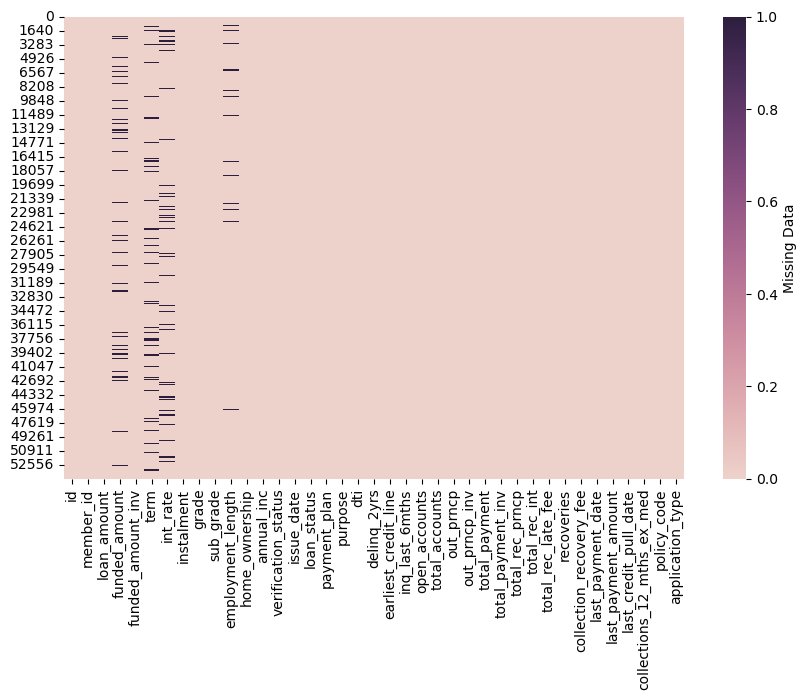

In [26]:
# Visualise remaining columns with null values

plotter.visualise_nulls()

For numerical columns a correlation plot can also be implemented to see whether the numerical columns with null values are missing completely at random, which would allow mean and median imputation to be used.

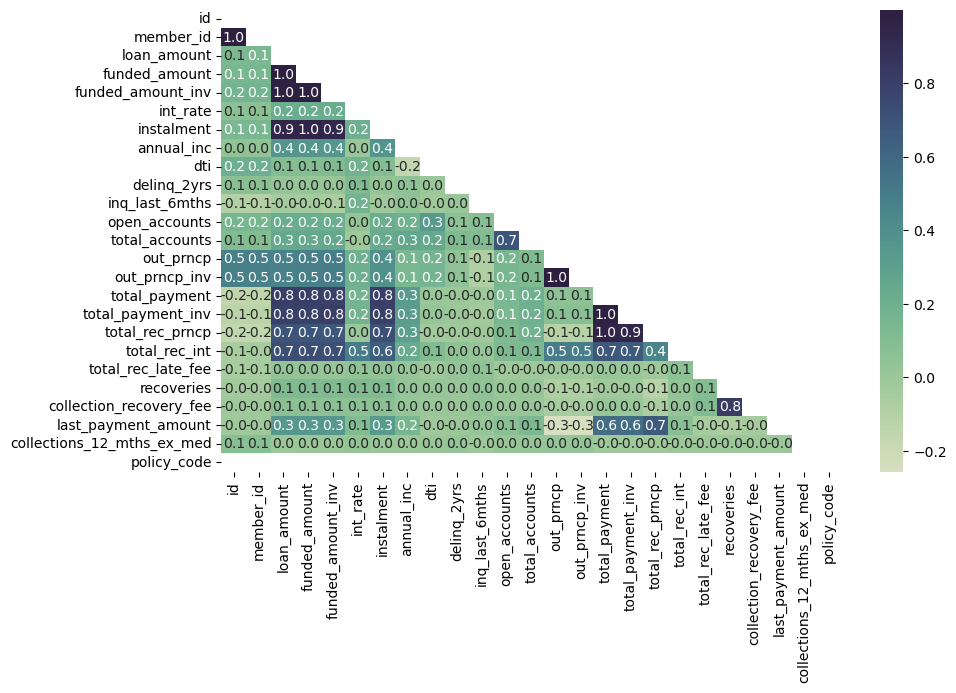

In [27]:
# Check correlation of all numeric columns

plotter.check_correlation()

Plotting the remaining columns with null values and checking the correlation, it is clear the missing values in one column are not correlated to missing values in another, apart from 'funded_amount' which has a 100% correlation with 'loan_amount' and 'funded_amount_inv'. The values are missing completely at random. As the percentages of missing values varies from 4-10%, some form of imputation is necessary to keep the analytic inegrity of these columns. 

For the cateogircal columns that contain null values, the unique values and their counts are as follows:

In [28]:
print(df['term'].value_counts()) 

36 months    35739
60 months    13599
Name: term, dtype: int64


In [29]:
df['employment_length'].value_counts()

10+ years    15894
2 years       5050
< 1 year      5010
3 years       4579
5 years       3826
1 year        3687
4 years       3473
6 years       3049
7 years       2960
8 years       2532
9 years       1926
Name: employment_length, dtype: int64

The null values are ignored in the count. It would be possible to impute with the mode in this instance, as the highest cateogry in both columns is far larger than the rest, by 2x for 36 months in 'term', or an order of magnitude for 10+ years in 'employment_length'.

For 'term', this may be a robust method as there are only two categories where one is the most populated. However for employment_length, a null value may indicate unemployment, retirement, another employment status or incorrect data recording. It is not possible to infer meaning from a null value alone and imputing with the mode may induce bias for future data analysis. If predictions/projections are to be made with the variable 'employment_length', it may be worth dropping the null values at a loss of 4% of the dataframe. For 'term' this would indicate a loss of 8% of the dataframe, and up to 12% loss if considering both 'term' and 'employment_length' in an analysis.

For now, simply replacing the missing values with 'Missing' will suffice. If analysis of data involving these variables is needed in the future and a 'Missing' category distorts the analysis, imputing with the mode is the next best option.

In [30]:
# Impute cateogircal columns missing values with the string 'Missing'. 

dftransform.replace_na_categorical('term', '36 months')
dftransform.replace_na_categorical('employment_length', 'Missing')

In [31]:
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [32]:
df['employment_length'].unique()

array(['5 years', '9 years', '8 years', '1 year', '10+ years', '< 1 year',
       'Missing', '7 years', '3 years', '4 years', '6 years', '2 years'],
      dtype=object)

In [33]:
df['term'] = df['term'].str.replace(' months','').astype(int)

##### Numeric columns
For the numeric column 'funded_amount', a comparison with the column 'funded_amount_inv' reveals there are almost identical:

In [34]:
df_similar = df[['funded_amount', 'funded_amount_inv']]
df_similar.head()

,funded_amount,funded_amount_inv
0,8000.000,8000.000
1,13200.000,13200.000
2,16000.000,16000.000
3,15000.000,15000.000
4,15000.000,15000.000


In [35]:
# Prints the percentage of duplicated rows between 'funded_amount' and 'funded_amount_inv'

df_similar = df[df.duplicated(['funded_amount','funded_amount_inv'])]
print(len(df_similar)/len(df)*100)

84.31608133086877


As 95% of the values are duplicated from 'loan_amount', it can be assumed that the majority of the 5.5% of null values can be imputed with the corresponding values from the same row in 'loan_amount':

In [36]:
# Method to replace null values in 'funded_amount' with the values in 'loan_amount'

dftransform.impute_with_another_col('funded_amount', 'loan_amount')

Finally, the remaining column 'int_rate' contains 9.5% null values. This may be better suited to regression or machine learning to impute the missing values, however that is beyond the scope of this EDA. However, imputing with the mean or median, whilst potentially introducing bias, may be the best option available. To determine whether to use the mean or median to impute, it is helpful to first look at the distribution of the column.

In [37]:
# Calculate statistics and p-value using D'Agostino's K-squared test.

datainfo.normality('int_rate')

Statistics=1417.246, p=0.000


A p-value of or close to zero suggests that the data in 'int_rate' is normally distributed and that the null hypothesis is false. To visualise the column and further check for normality it is useful to plot a histogram to confirm:

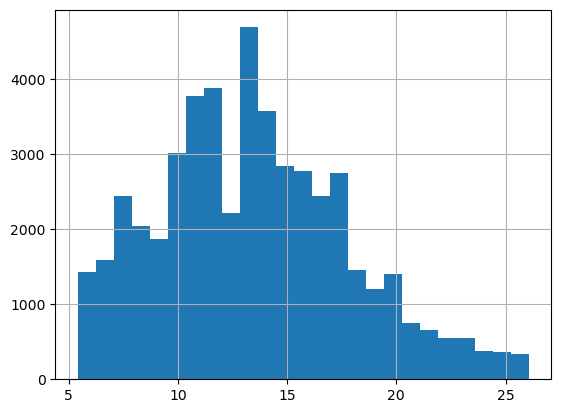

In [38]:
plotter.plot_histogram('int_rate')

There appears to be some positive skew in the data, which would render the mean unreliable for imputing with. We can confirm the skew with a Q-Q plot

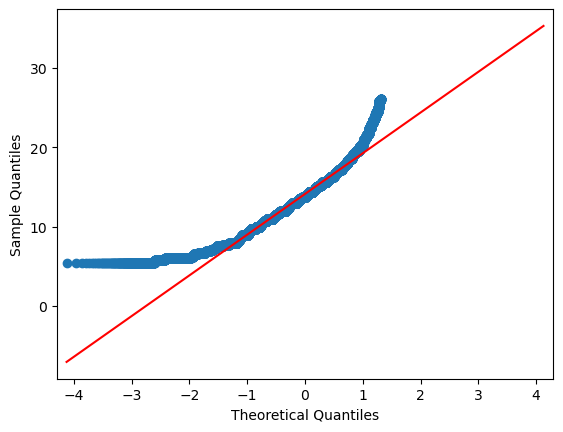

In [39]:
plotter.col_qq_plot('int_rate')

As observed with the histogram, there is some central agreement with a normal plot, however deviations occur at both extremities. Due to the nature of the 'int_rate' variable representing the annual interest rate of the loan, the majority of loans are issued with a 'low' interest rate, whilst a small percentage are issued with a high interest rate. Again, the skew can be confirmed with comparing the mean and median, which would be similar for a normal distribution:

In [40]:
# Retrieve median and mean from 'int_rate' column

datainfo.statistical_info('int_rate')

Mean value for series int_rate: 13.507935881980346 

Median value for series int_rate: 13.16 

Standard deviation for series int_rate: 4.393898606813466 



They are similar values, however imputing with the median appears to be the most sensible method.

In [41]:
# Impute column 'int_rate' with the median value

dftransform.impute_with_median('int_rate')

In [42]:
# Find the remaining columns with null values

datainfo.null_info()

The series which contain null values with the percentage of null values are:

Series([], dtype: float64)


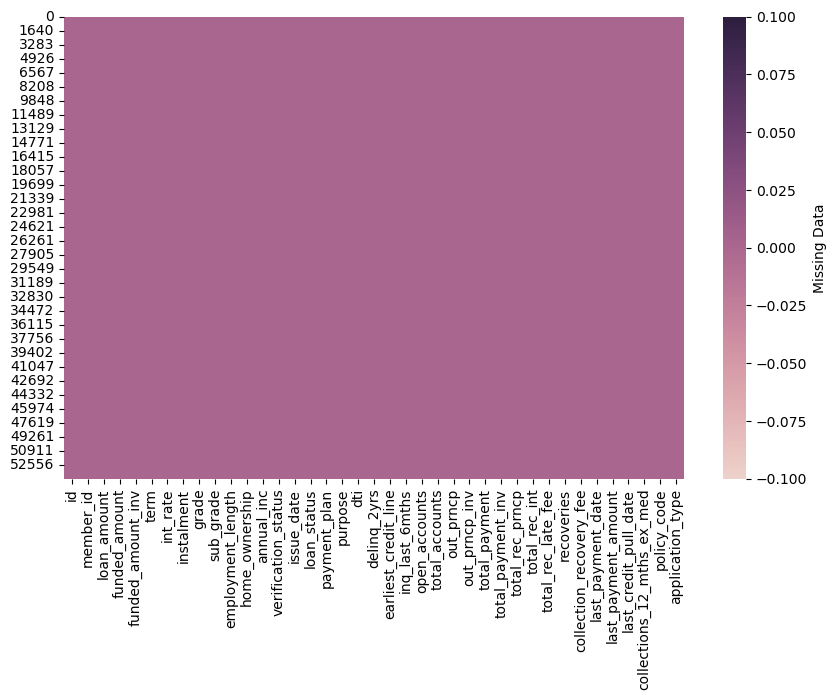

In [43]:
# Visualise the remaining columns containing null values

plotter.visualise_nulls()

There are no more null values left in the dataframe :-)

In [44]:
df['issue_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 54100 entries, 0 to 54227
Series name: issue_date
Non-Null Count  Dtype         
--------------  -----         
54100 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 845.3 KB


In [45]:
with open('data_type_null_corrected_loan_payments.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8', date_format = '%b-%Y')

In [46]:
df = pd.read_csv('data_type_null_corrected_loan_payments.csv', low_memory=False, index_col =0)

In [47]:
df['issue_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 54100 entries, 0 to 54227
Series name: issue_date
Non-Null Count  Dtype 
--------------  ----- 
54100 non-null  object
dtypes: object(1)
memory usage: 845.3+ KB


### Rectifying skewed data

Skewed data can lead to biased models and inaccurate results, so it's important to address this issue before proceeding with any analysis. The next steps will identify skewed data, determine the best method to rectify the skew and implement it on the relevant columns.

#### Identifying skew

First to determine which numeric columns are skewed, histograms with kernel density estimates are plotted and the skew value is calculated

/Users/chloe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/chloe/EDA Project Customer Loans in Finance/plotter.py:87: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


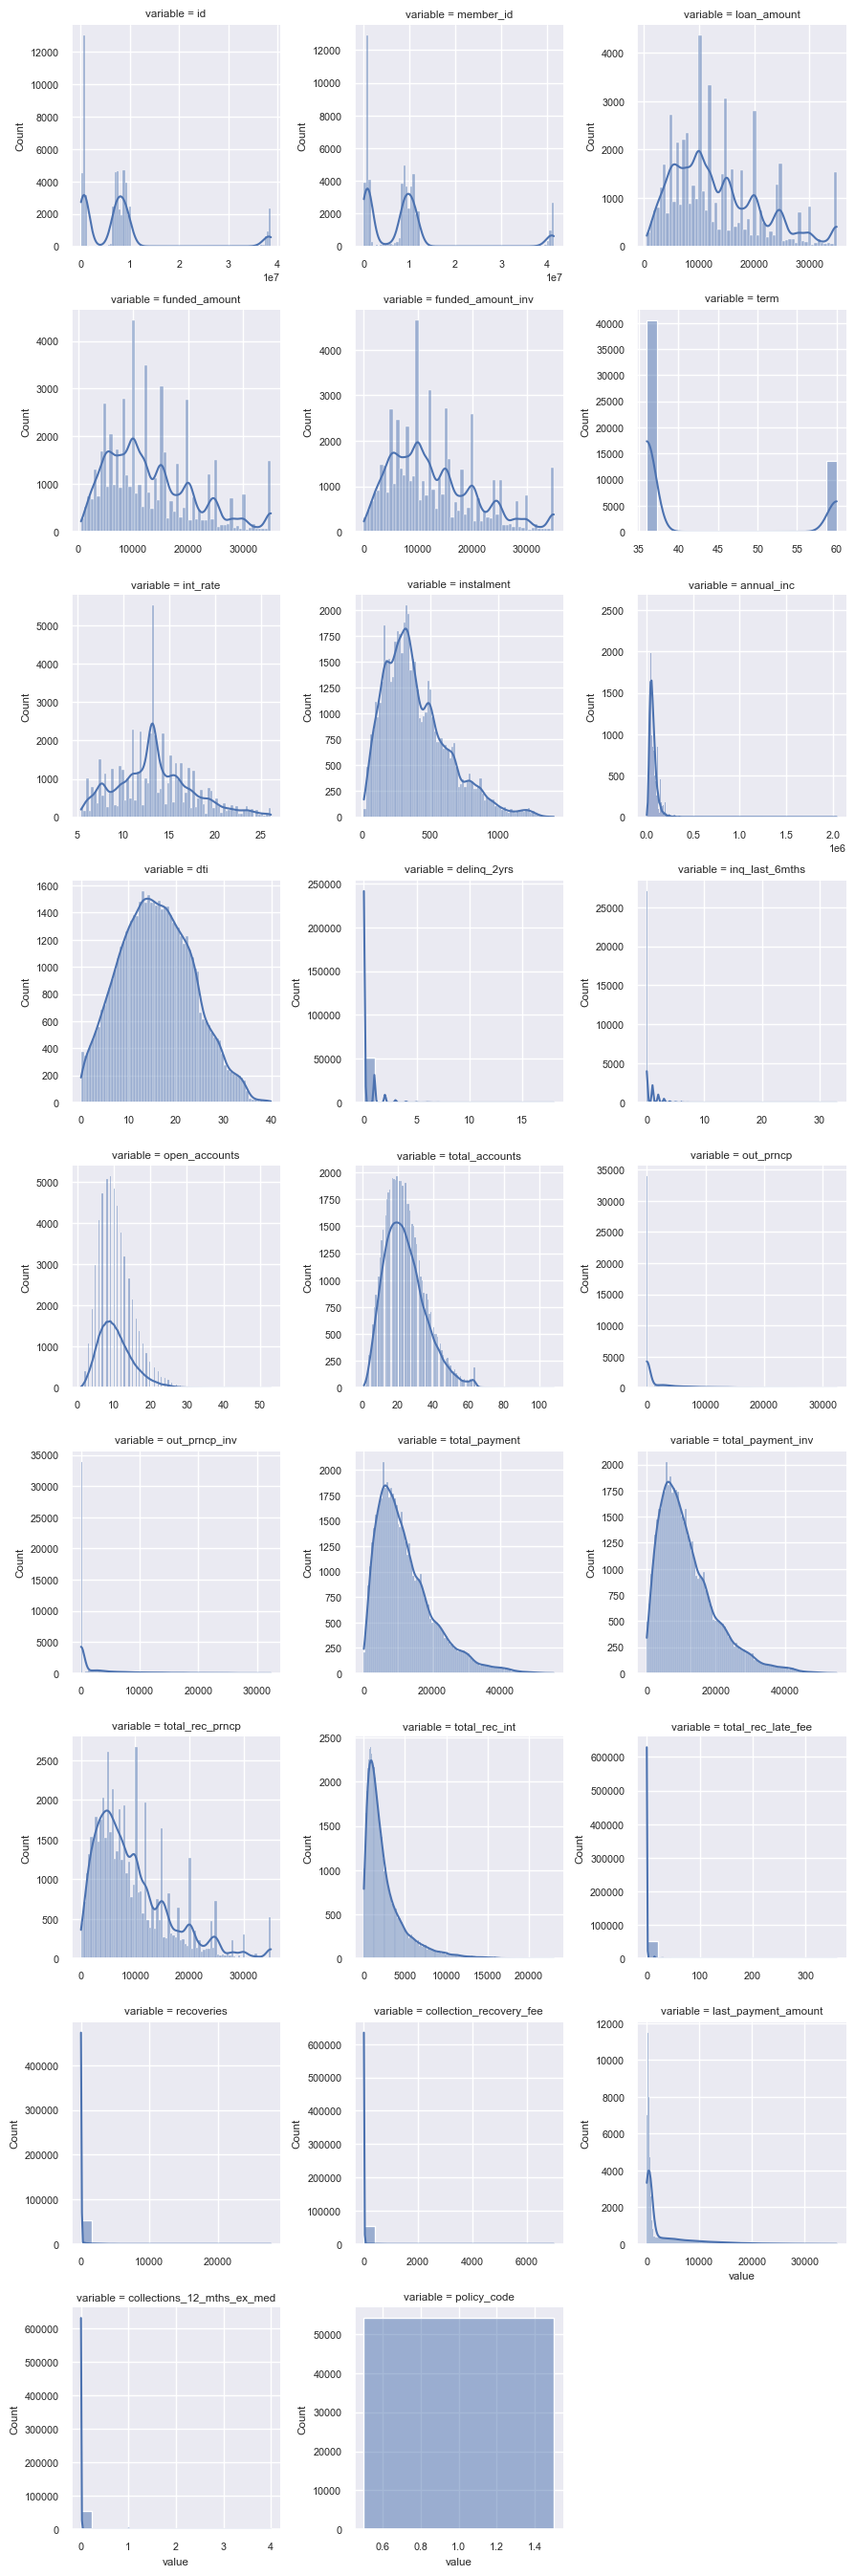

In [48]:
# Plot histogram with KDE for every numeric column

plotter.plot_skewness()

In [49]:
# Retrieve skew value for all numeric columns

datainfo.skewed_info()

Skew of id:  2.37
Skew of member_id:  2.2
Skew of loan_amount:  0.8
Skew of funded_amount:  0.82
Skew of funded_amount_inv:  0.81
Skew of term:  1.15
Skew of int_rate:  0.46
Skew of instalment:  1.0
Skew of annual_inc:  8.74
Skew of dti:  0.19
Skew of delinq_2yrs:  5.32
Skew of inq_last_6mths:  3.24
Skew of open_accounts:  1.06
Skew of total_accounts:  0.78
Skew of out_prncp:  2.35
Skew of out_prncp_inv:  2.35
Skew of total_payment:  1.27
Skew of total_payment_inv:  1.26
Skew of total_rec_prncp:  1.26
Skew of total_rec_int:  2.2
Skew of total_rec_late_fee:  13.26
Skew of recoveries:  14.38
Skew of collection_recovery_fee:  27.79
Skew of last_payment_amount:  2.5
Skew of collections_12_mths_ex_med:  20.3
Skew of policy_code:  0


By visually inspecting the histograms alongside the skew values, it is apparent that any skew value over 0.8 demonstrates a recognisable skew from normal distribution. It is also clear that some variables are not continuous and don't need to be corrected. The list of excluded columns is:
['id','member_id', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'policy_code]

In [50]:
# Create list of columns with a skew value > 0.8

threshold_skewed_columns = datainfo.threshold_skew_list(['id','member_id', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'policy_code'], threshold = 0.8)

As some columns contain negative values, it is necessary to distinguish these columns to perform different transforms. For example, a Box-Cox transform can only take positive values whereas a Yeo-Johnson transform can take both positive and negative transforms.

In [51]:
# Create list of positive and negative columns with a threshold skew value over 0.8

pos_threshold_col, neg_threshold_col = datainfo.get_positive_negative_cols(threshold_skewed_columns)

A method was created to plot histrograms and the corresponding q-q plots of the original column data alongside data transformed with different skew correcting functions. The skewness calculation is listed in the histogram legens to understand which transform has reduced the skew more effectively. The transforms are carried out on a copy of the dataframe and will be implemented to the original dataframe once the appropriate transform for each column is determined.

The columns containing only positive values are inserted as parameters into the positive skew transform method. Box-Cox and Yeo-Johnson were intially performed on all positive columns, however their results were similar so the simpler Box-Cox was favoured over Yeo-Johnson, which was discarded from the plots.

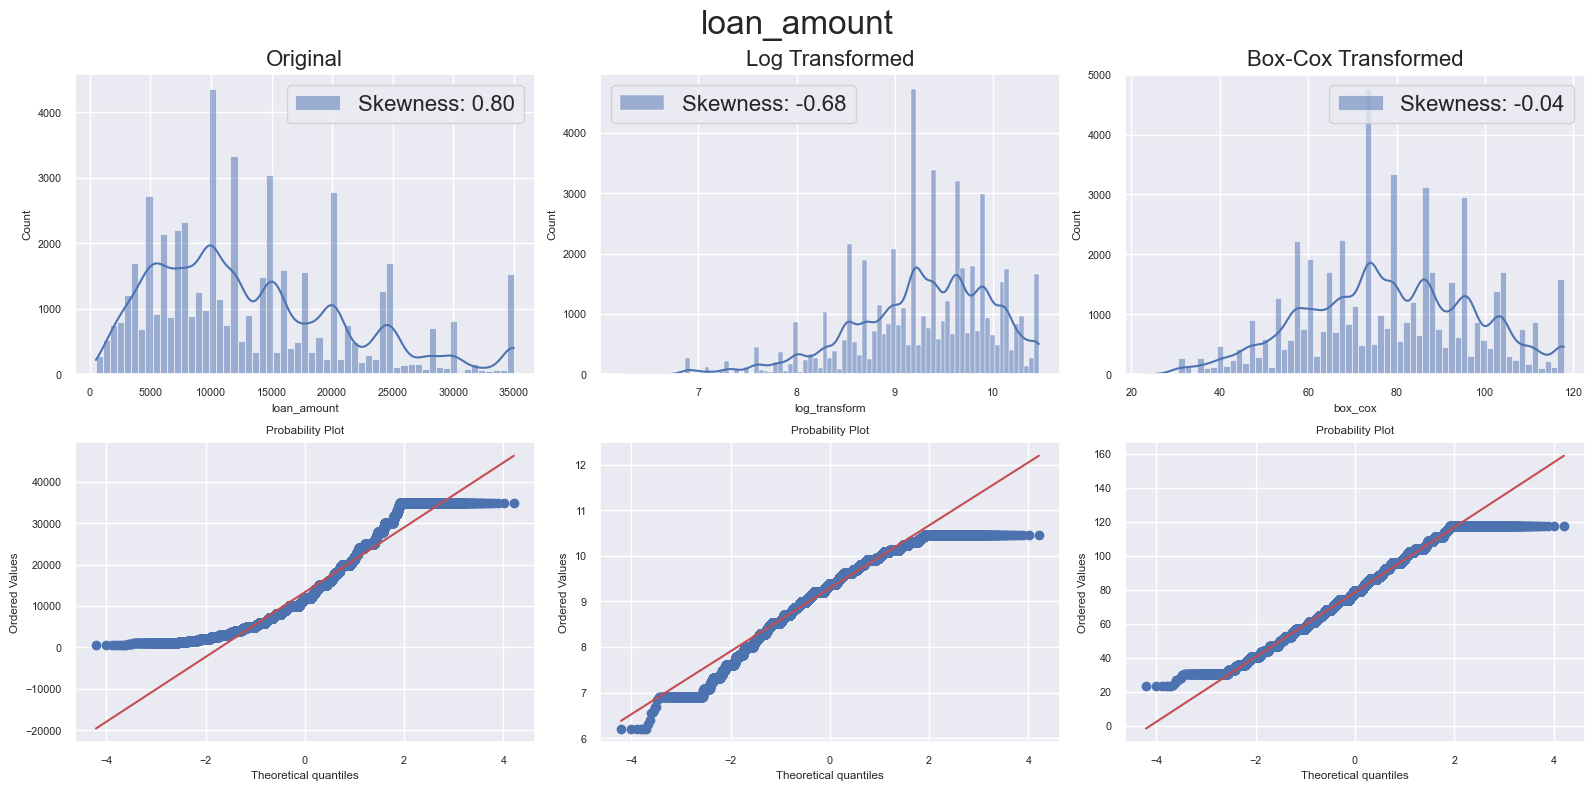

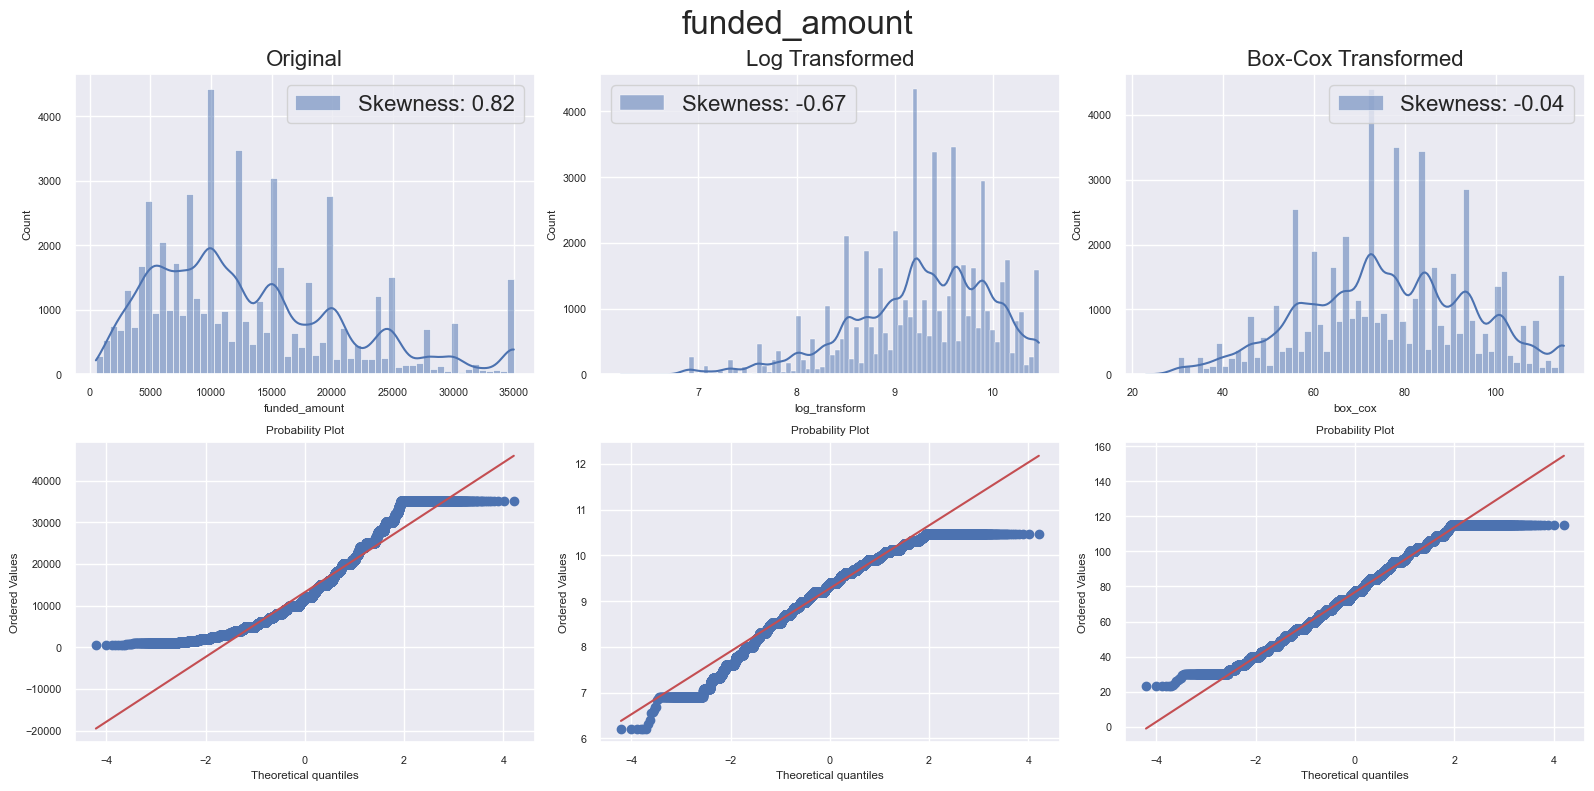

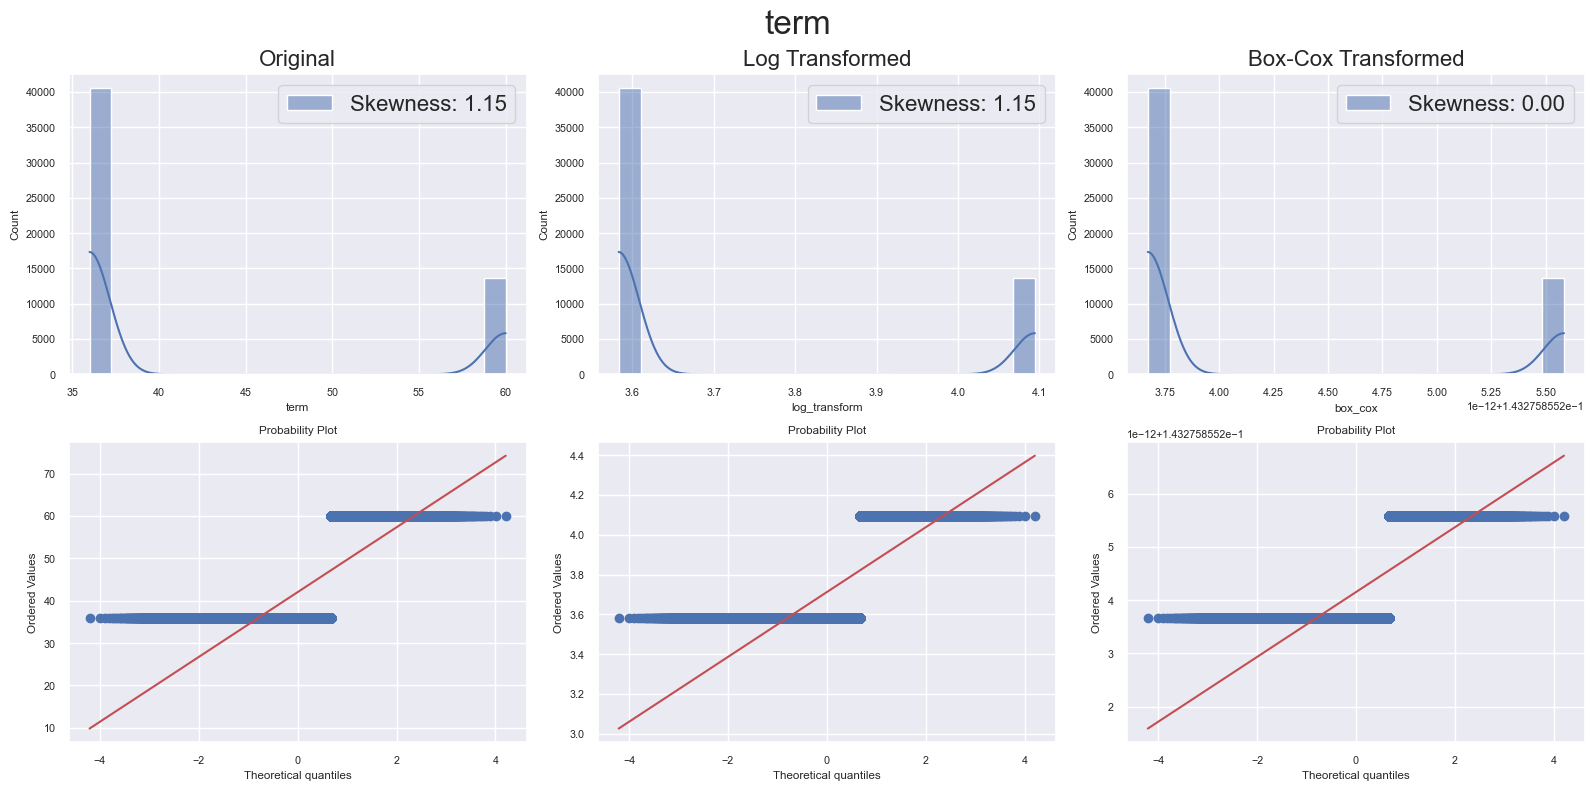

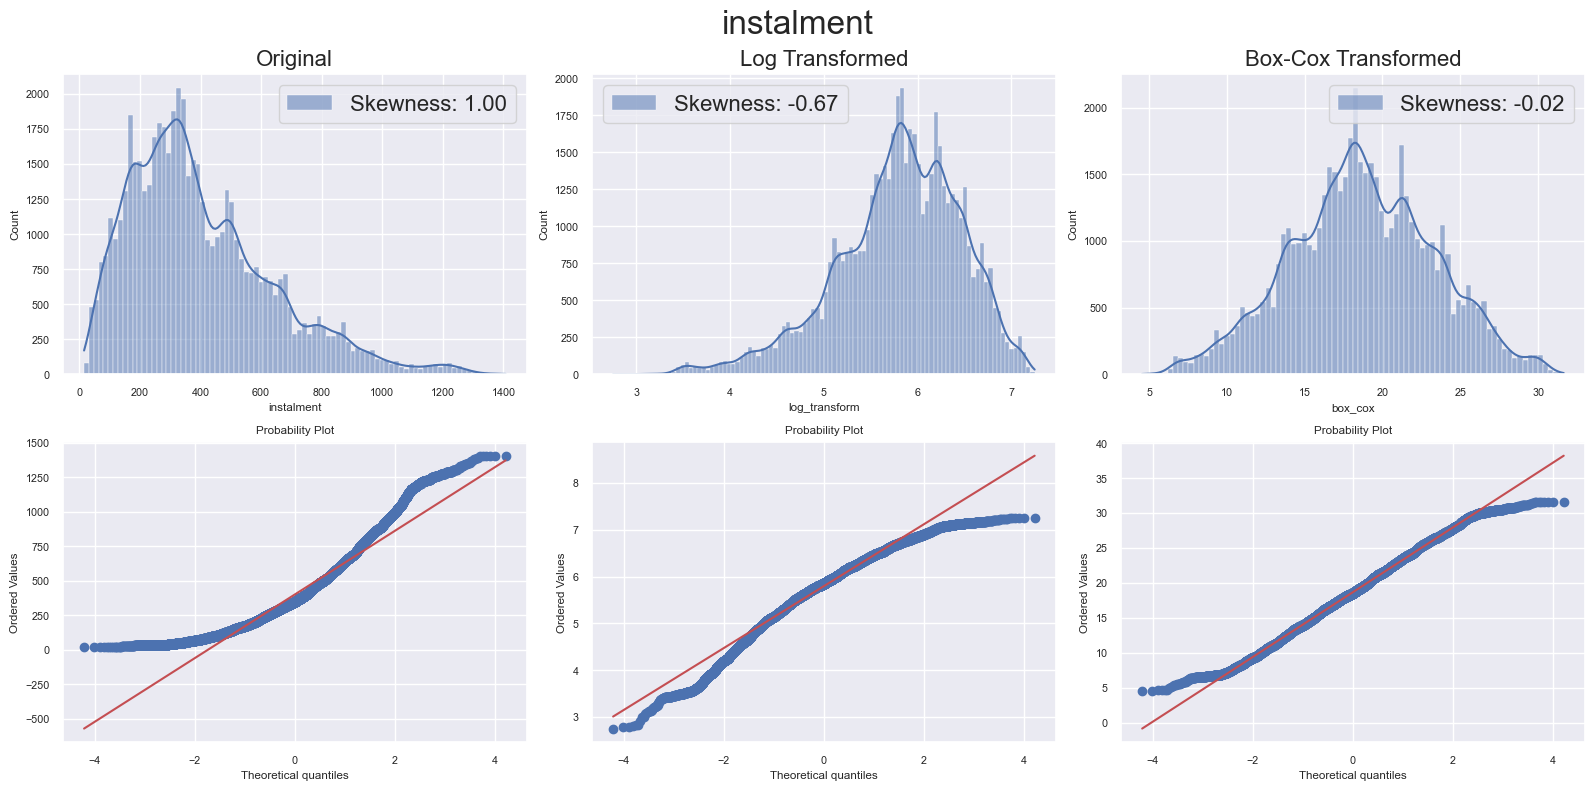

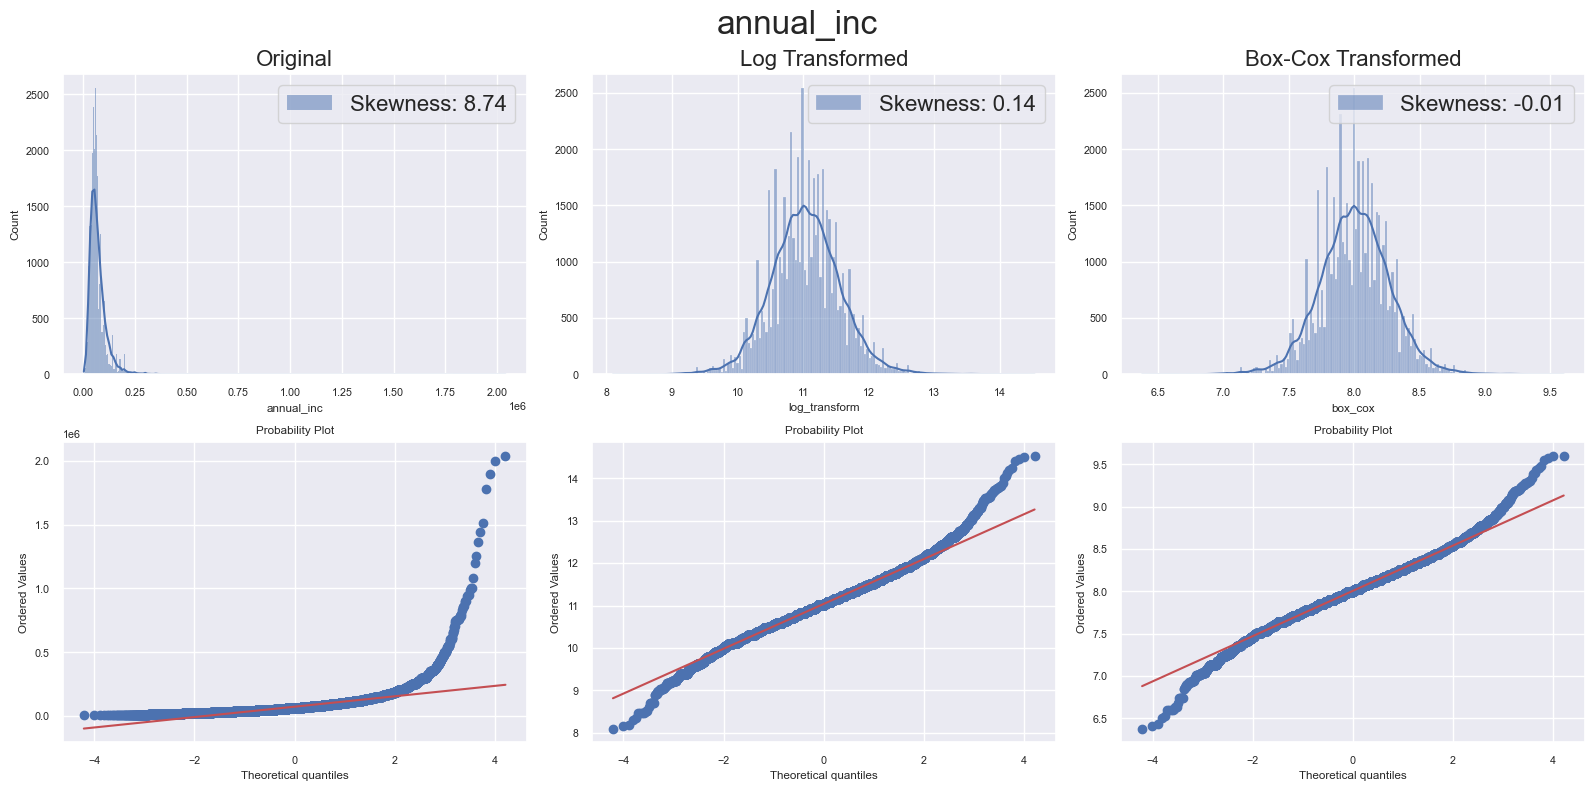

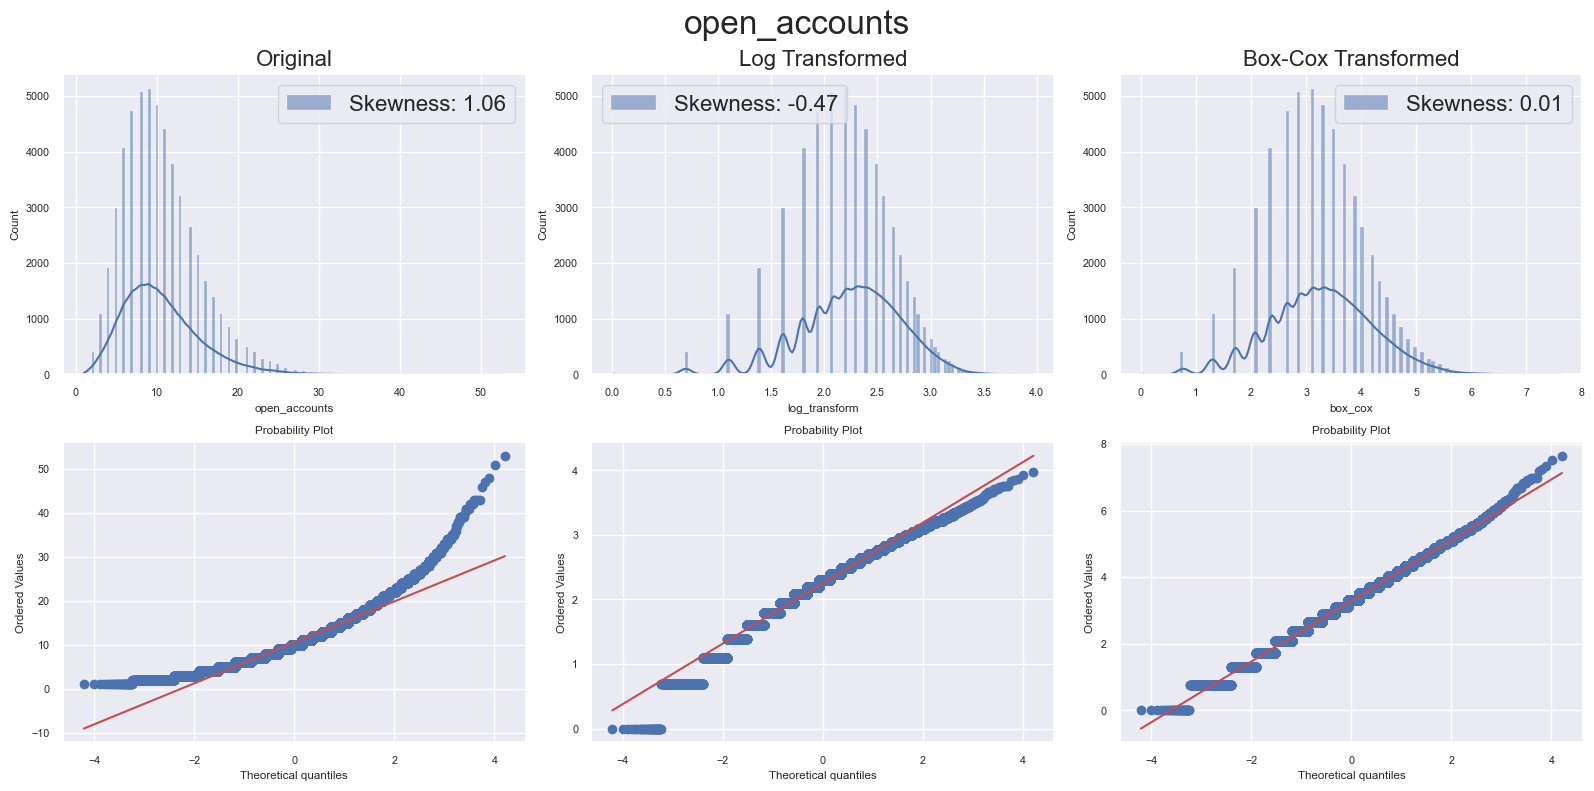

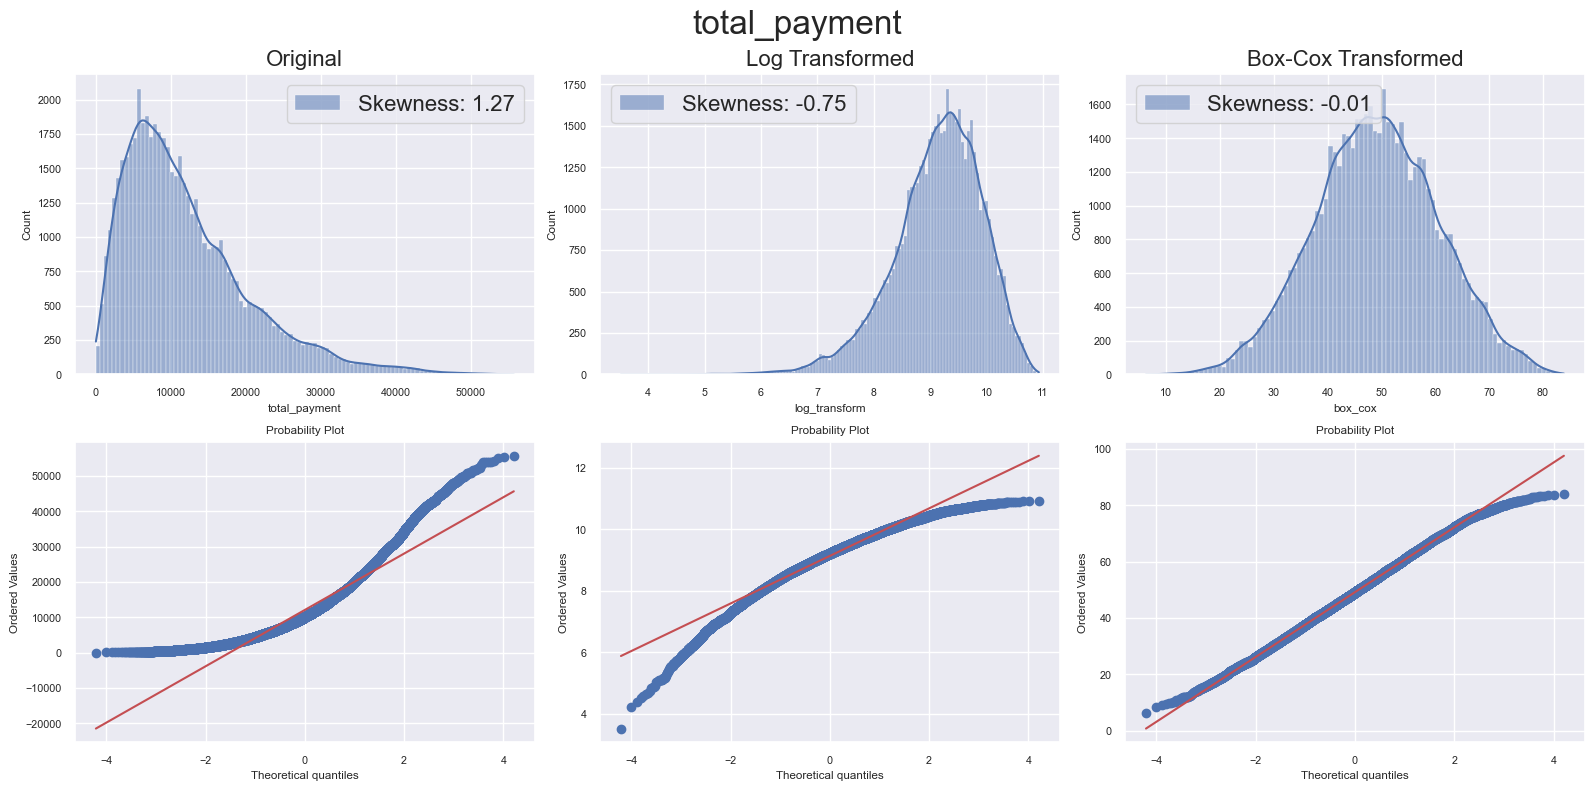

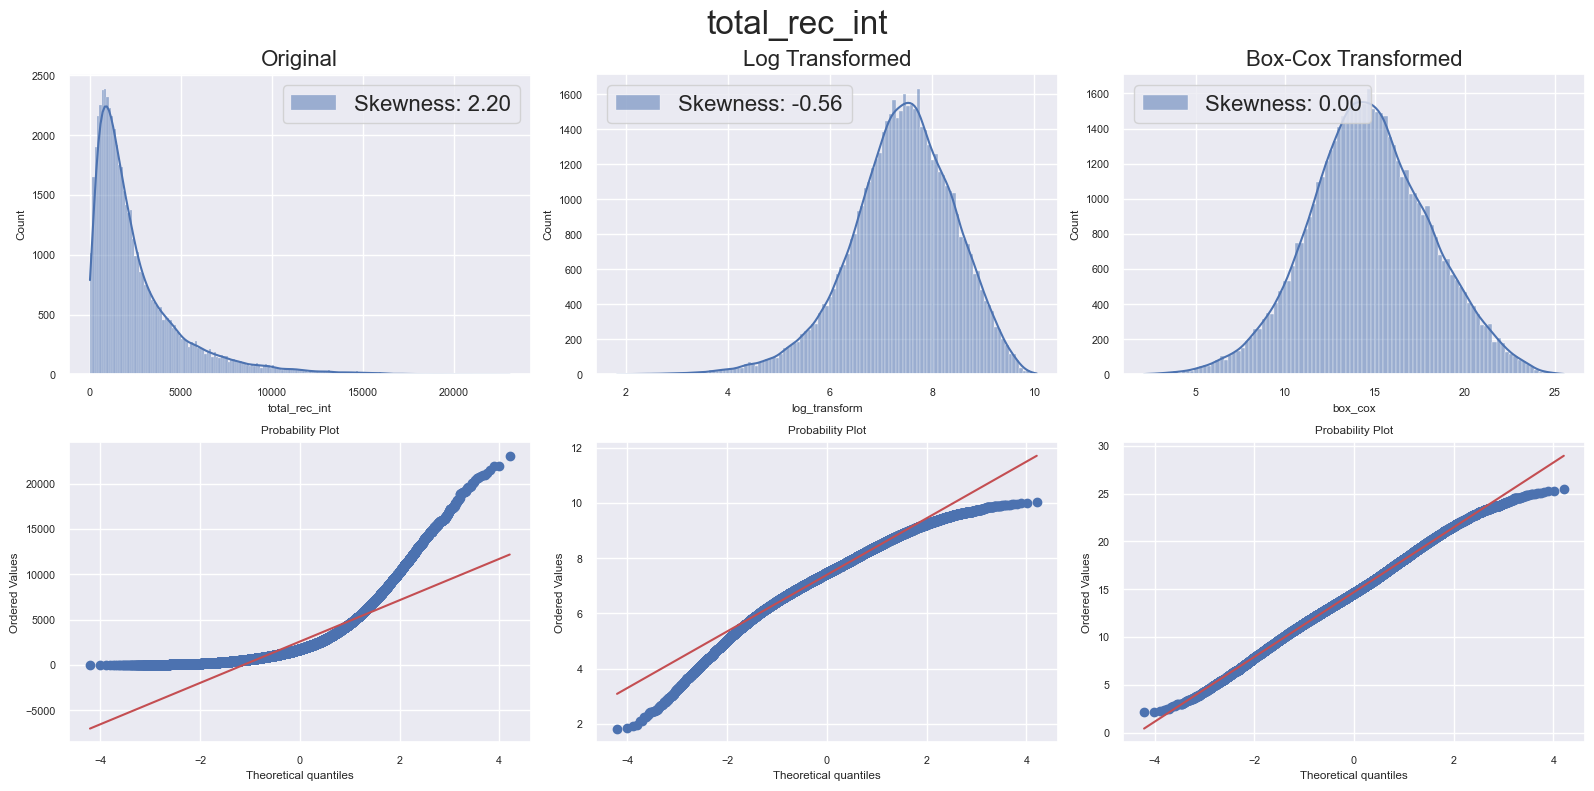

In [52]:
# Generate histograms and q-q plots with skew transformations for positive columns, using log transform and box-cox transform

for col_name in pos_threshold_col:
    plotter.pos_skew_transforms_and_qq(col_name)

For the negative columns, a log-transform and Yeo-Transform were performed for each.

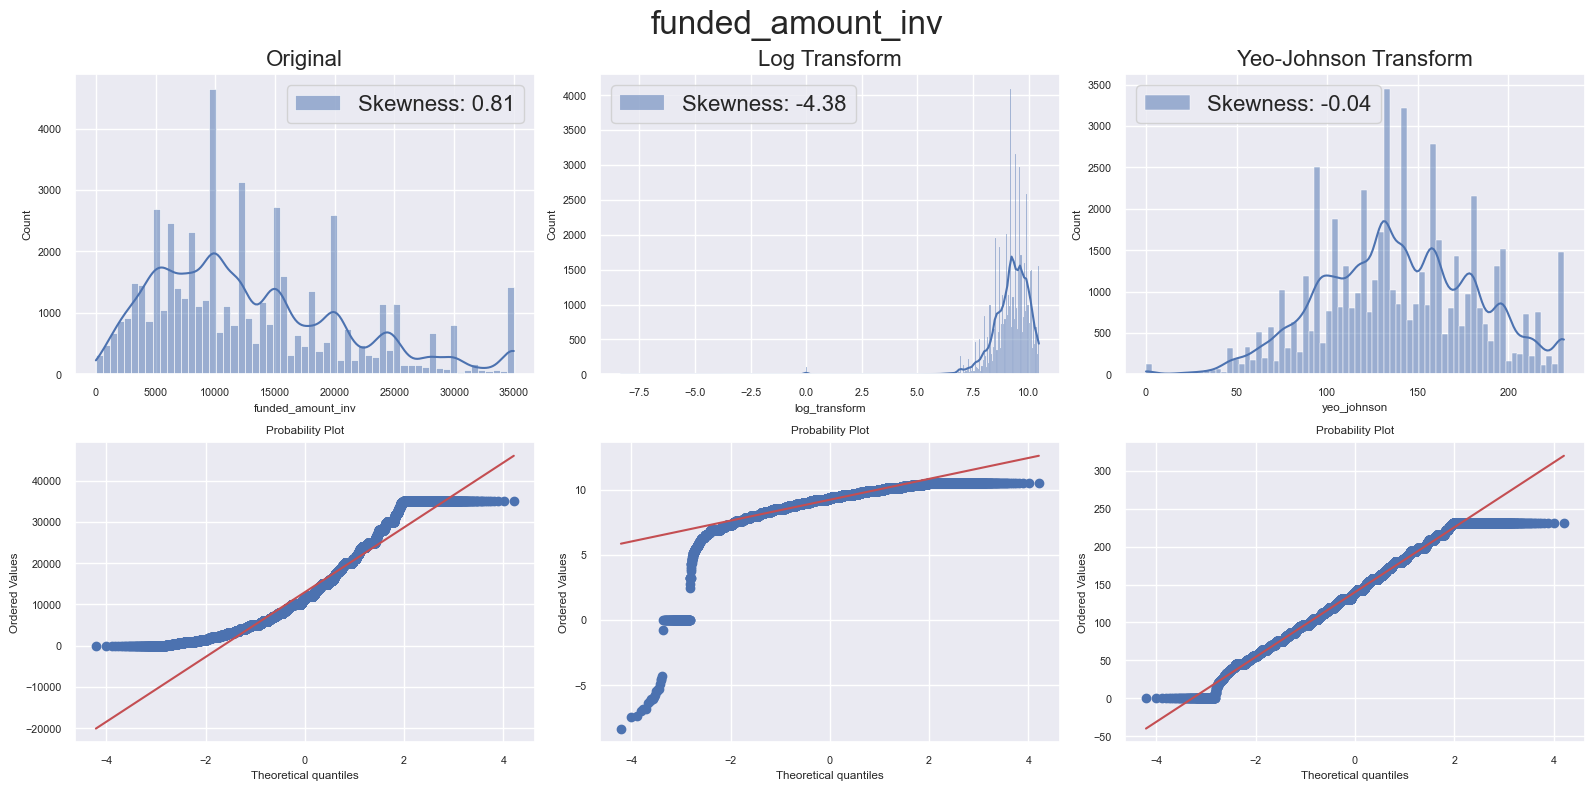

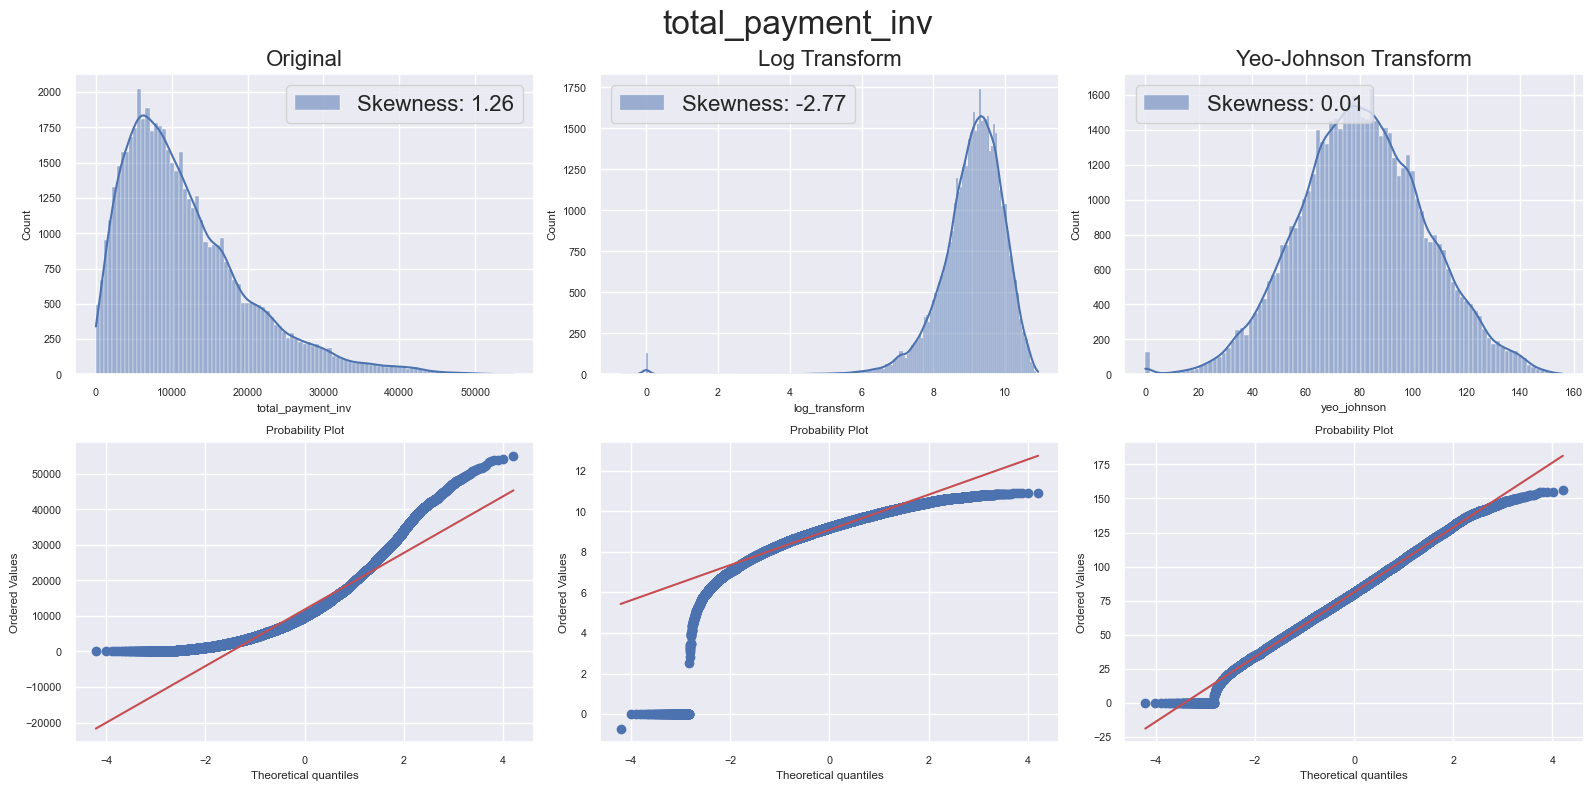

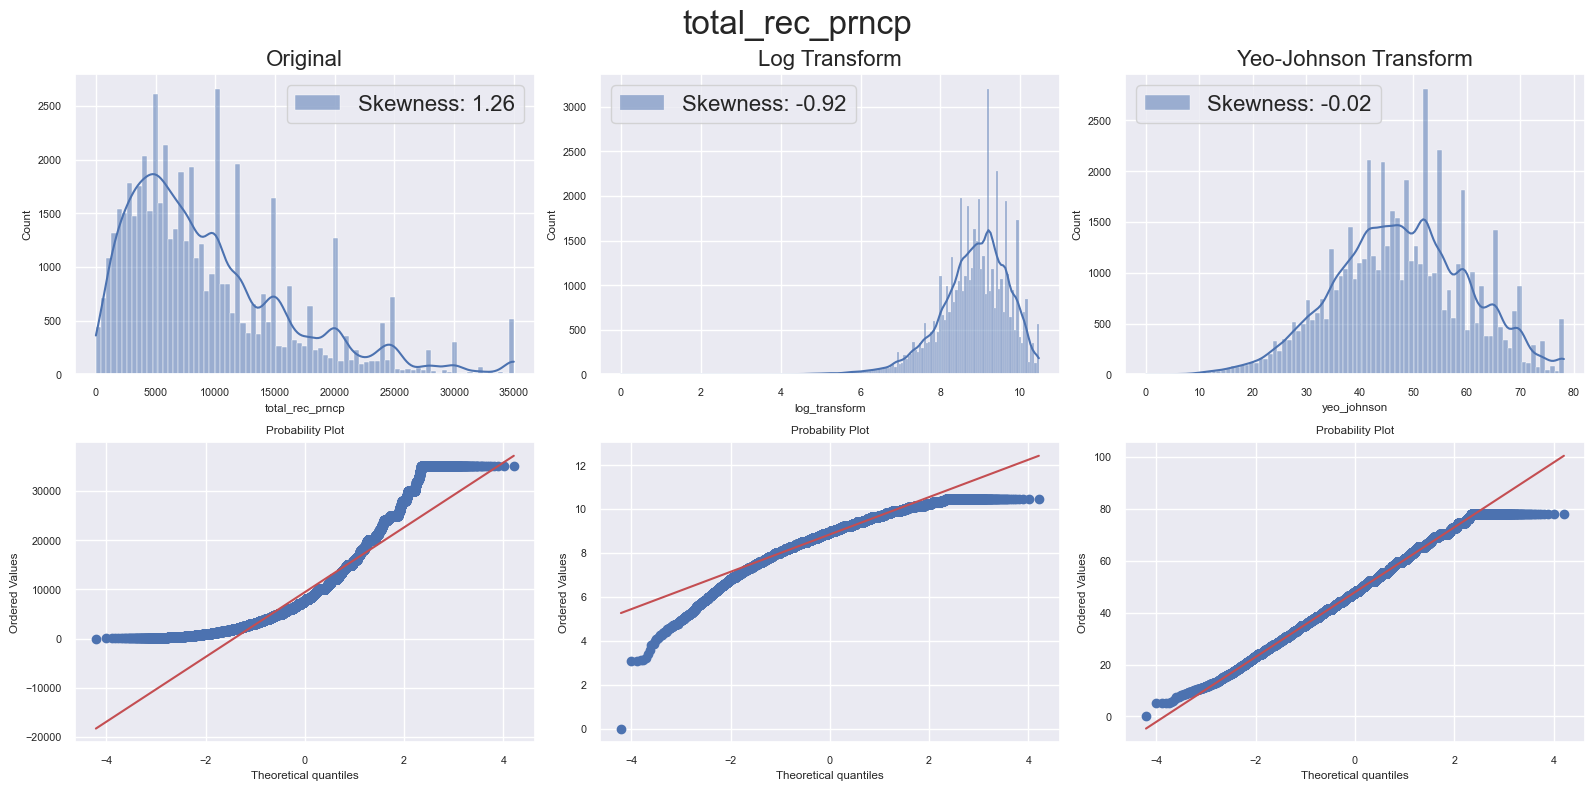

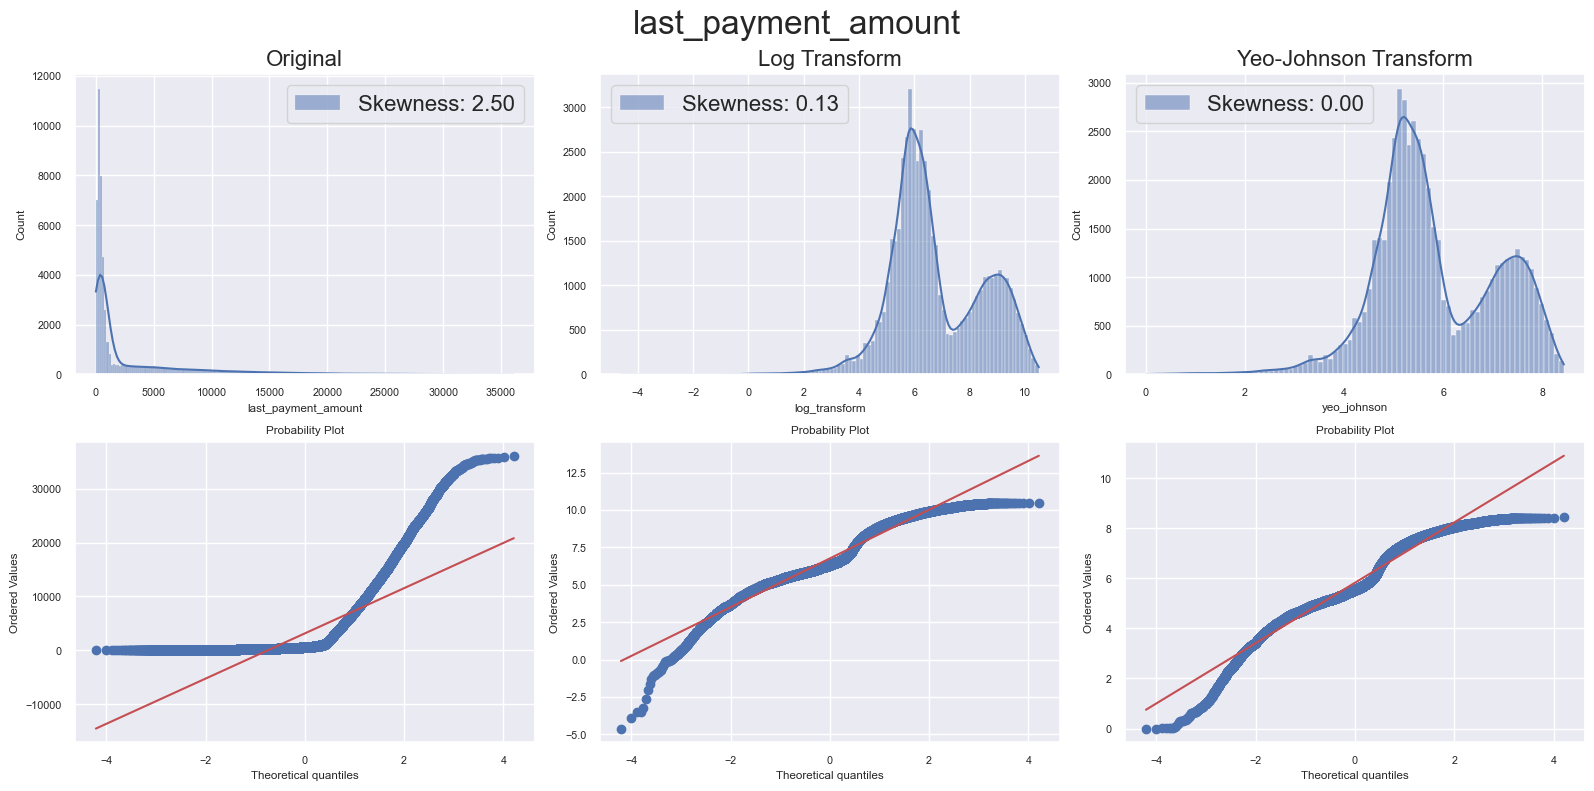

In [53]:
# Repeat the same for columns containing negative values, this time using Yeo-Johnson Transform instead of Box-Cox

for col_name in neg_threshold_col:
    plotter.neg_skew_transforms_and_qq(col_name)

First looking at the positive data, it is clear the skew of every column is dramatically improved with a Box-Cox transform.
Similarly, the skew of every column containing negative values is improved the most with a Yeo-Johnson transform. Therefore, these transforms will be implemented to the original data frame with the DataFrameTransform class.

In [54]:
# Create lists for each transform with each column which has the most reduced skew with this transform

box_cox = ['loan_amount', 'funded_amount', 'instalment', 'annual_inc', 'open_accounts', 'total_payment', 'total_rec_int']
yeo_johnson = ['funded_amount_inv', 'total_payment_inv', 'total_rec_prncp', 'last_payment_amount']

In [55]:
# Perform Box-Cox transform

for col_name in box_cox:
    dftransform.box_cox_transform(col_name)

In [56]:
# Perform Yeo-Johnson transform

for col_name in yeo_johnson:
    dftransform.yeo_johnson_transform(col_name)

/Users/chloe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/chloe/EDA Project Customer Loans in Finance/plotter.py:87: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


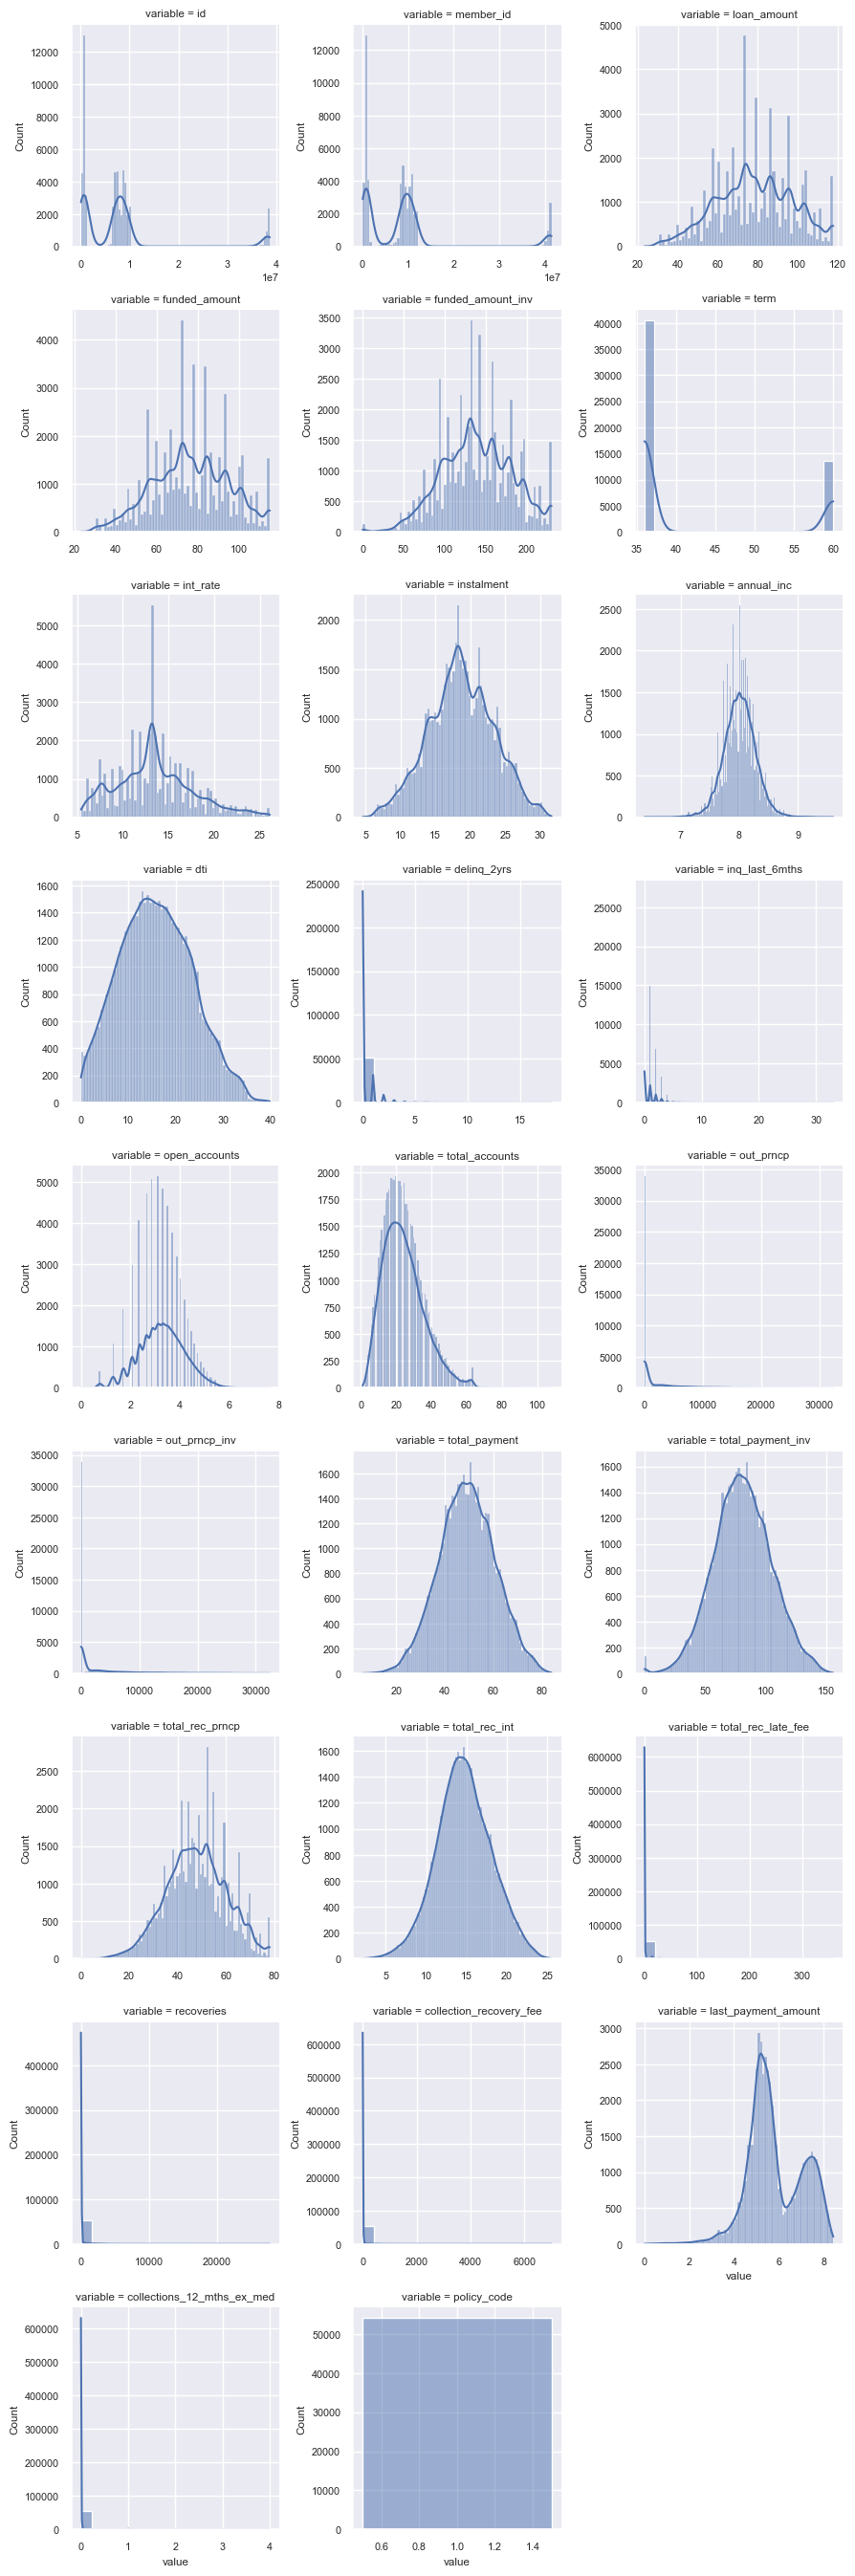

In [57]:
# Check the skewness of all columns after some have been transformed

plotter.plot_skewness()

In [58]:
# Save a new csv of the transformed dataframe

with open('skewness_corrected_loan_payments.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8')

Now that the columns have been corrected for excessive skewness, the next stage is to proceed with removing outliers.

---

### Outlier removal

#### Outlier visualisation

A box plot is created for each numerical column and fliers are highlighted in red, which represents any data point outside the whiskers which show the range of data.

/Users/chloe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/chloe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/chloe/EDA Project Customer Loans in Finance/plotter.py:162: UserWarning: The figure layout has changed to tight
  pyplot.tight_layout()


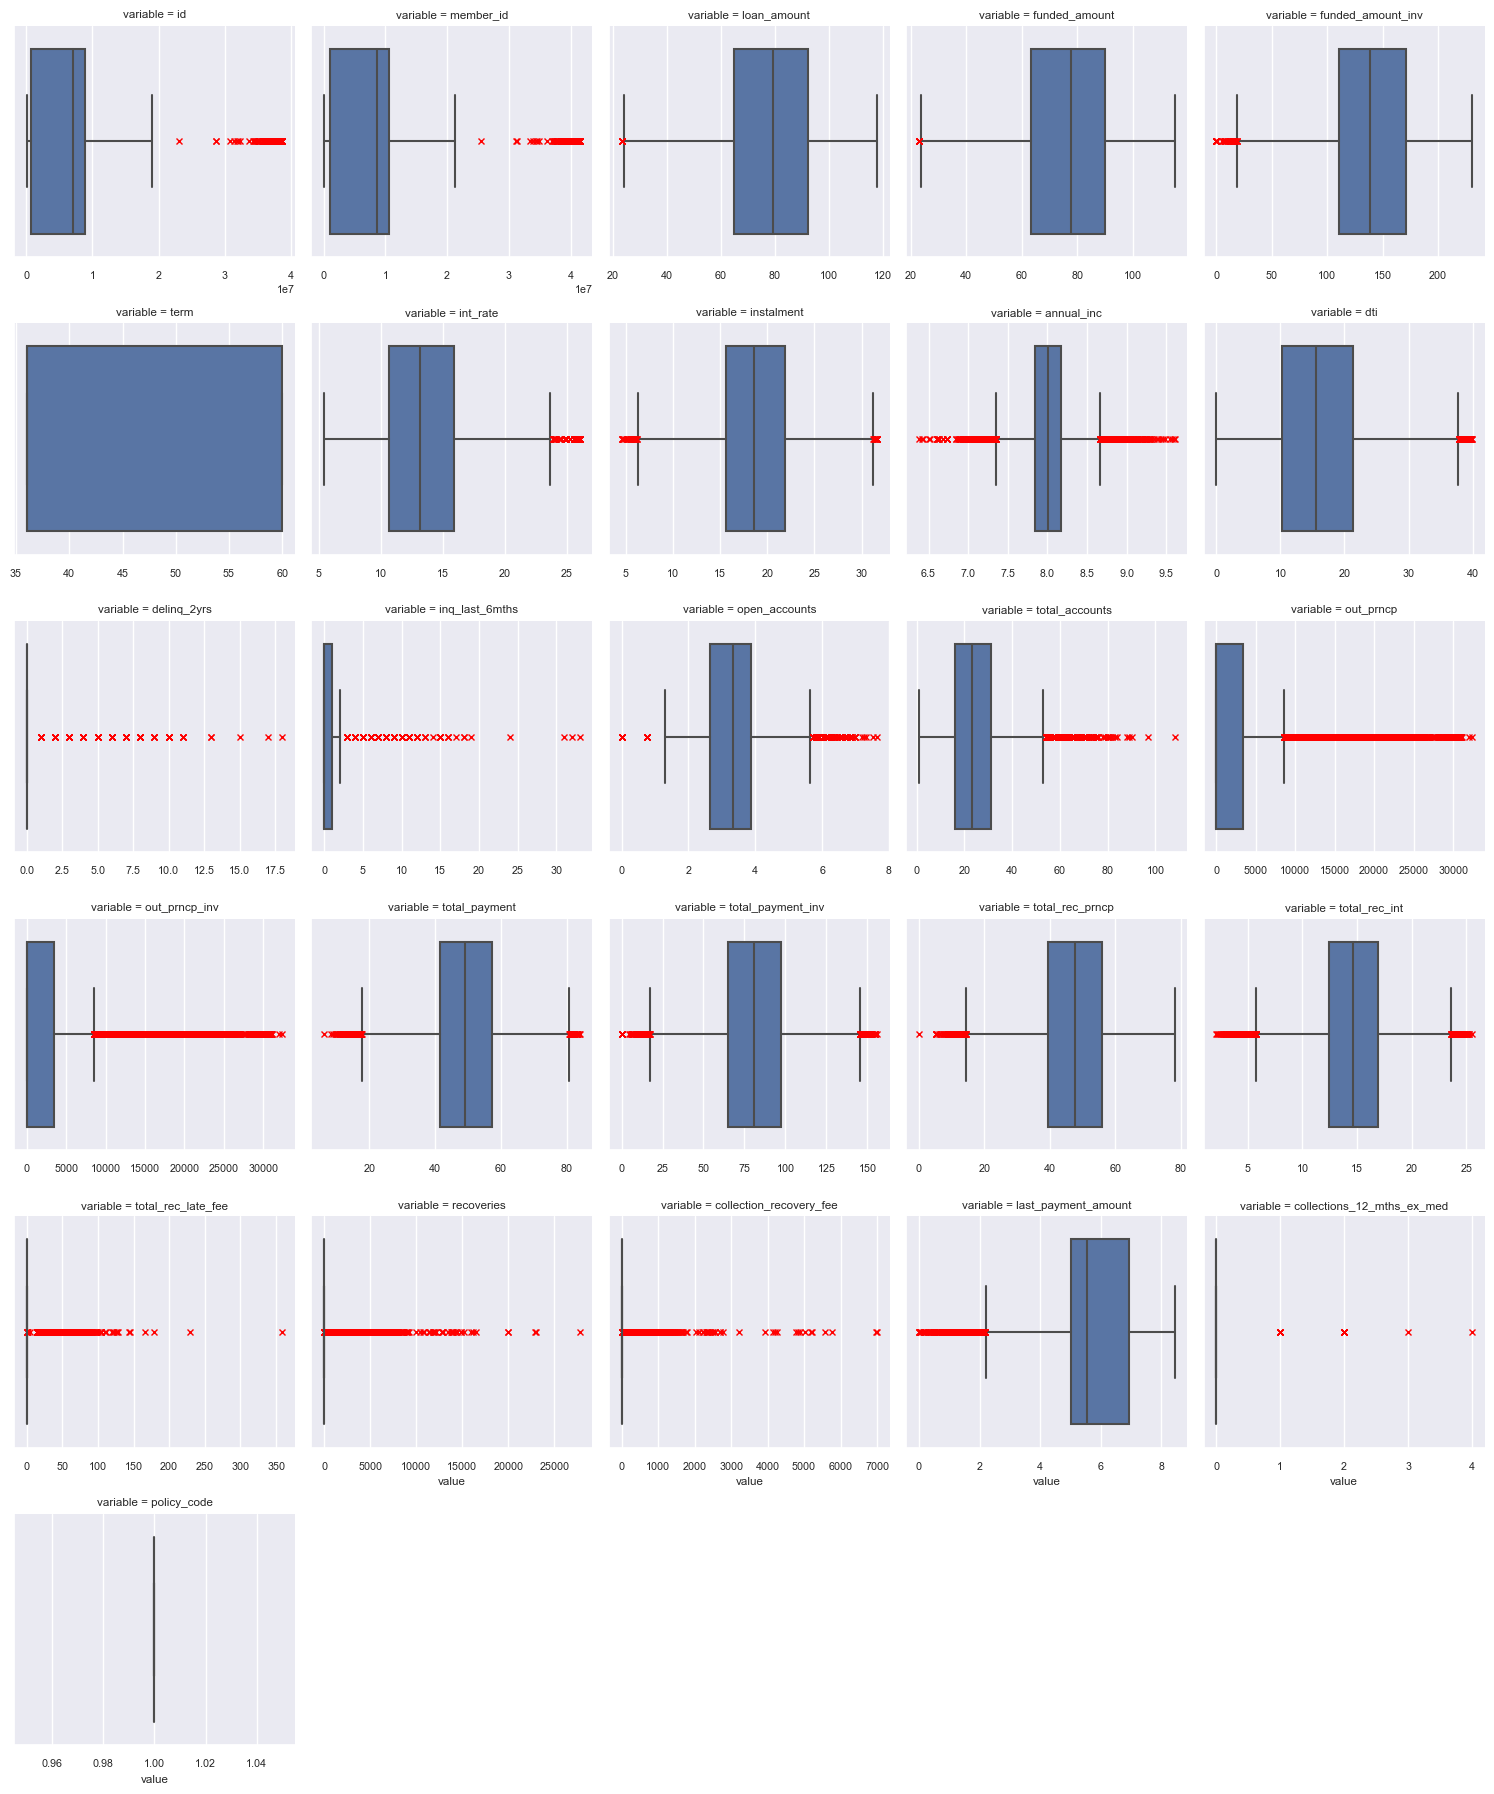

In [59]:
numerical_series = datainfo.numerical_df()
plotter.outlier_box_plot(numerical_series)

In [60]:
# A copy of the dataframe is created before the removal of outliers for comparison purposes later on

df_with_outliers = df
df.shape

(54100, 39)

In [61]:
# Create a list of columns with outliers to remove and specify the z-score threshold and drop the rows containing z-scores above the threshold

col_with_outliers = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']
for col_name in col_with_outliers:
    df = dftransform.drop_outliers(col_name, 3)
 

In [62]:
datatransform = DataTransform(df)
datainfo = DataFrameInfo(df)
dftransform = DataFrameTransform(df)
plotter = Plotter(df)

In [63]:
df.shape

(52448, 39)

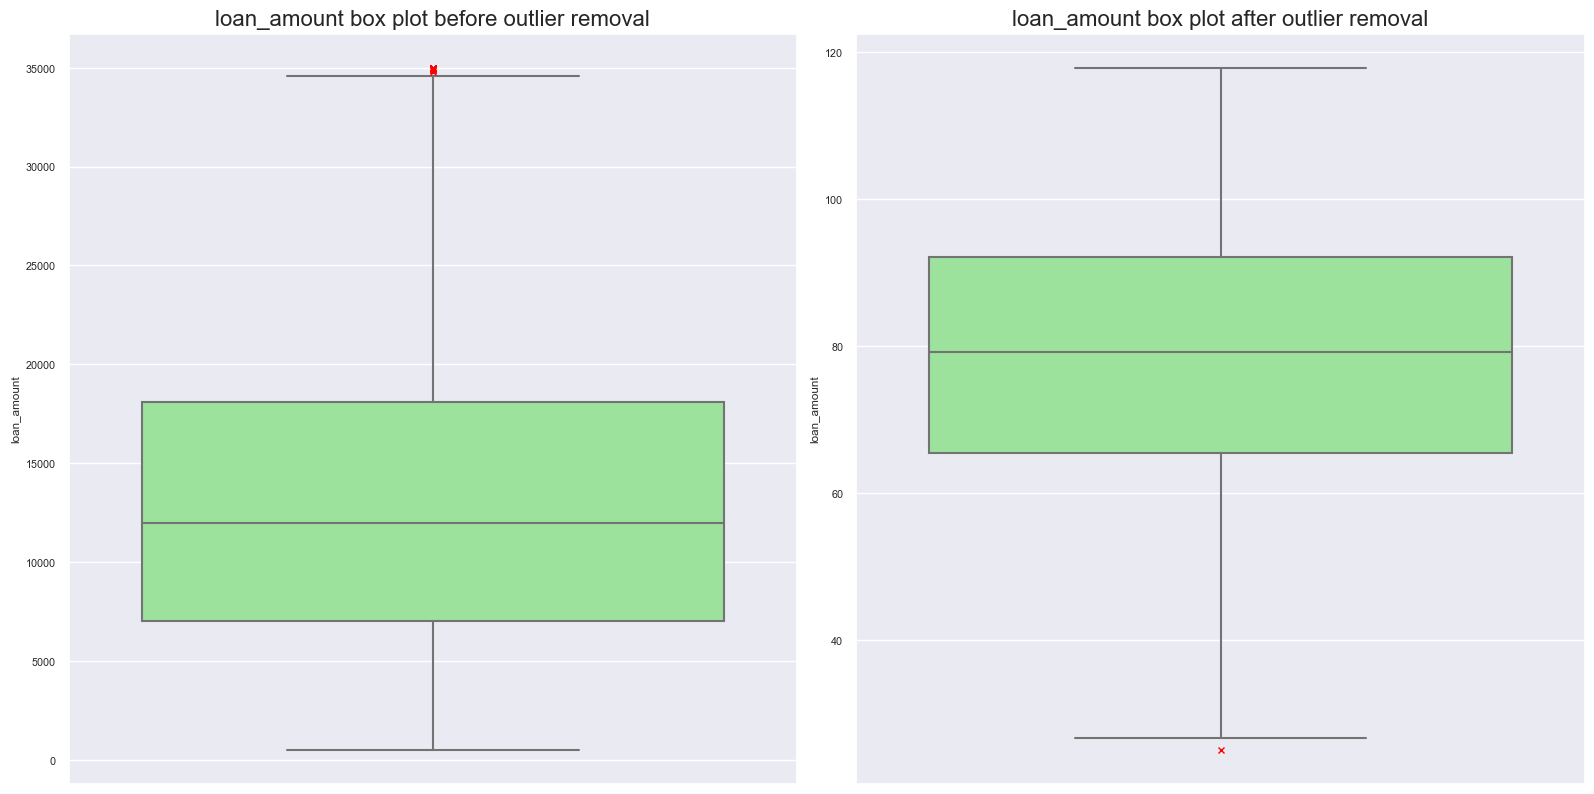

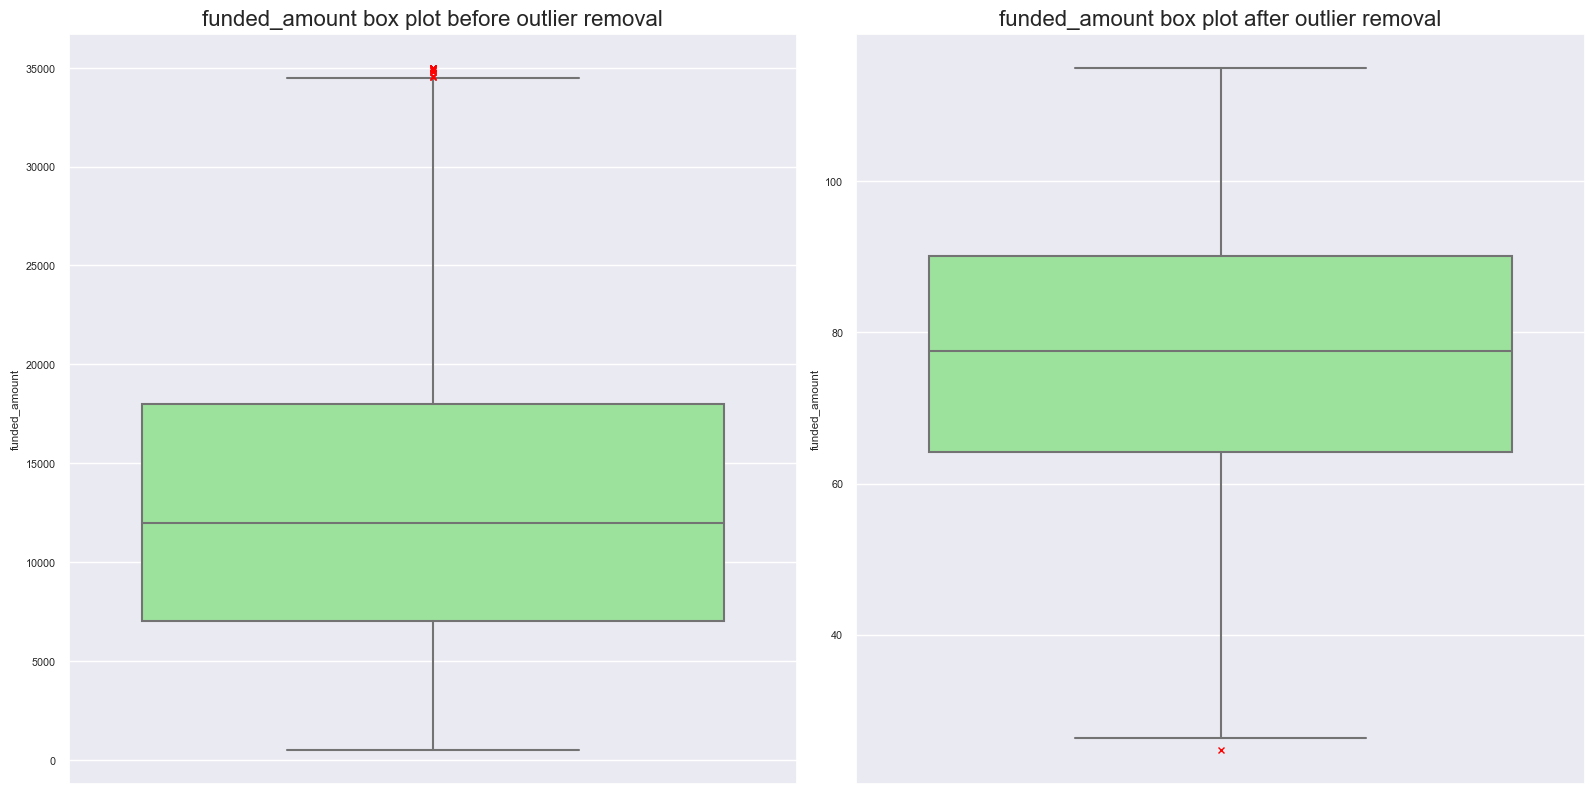

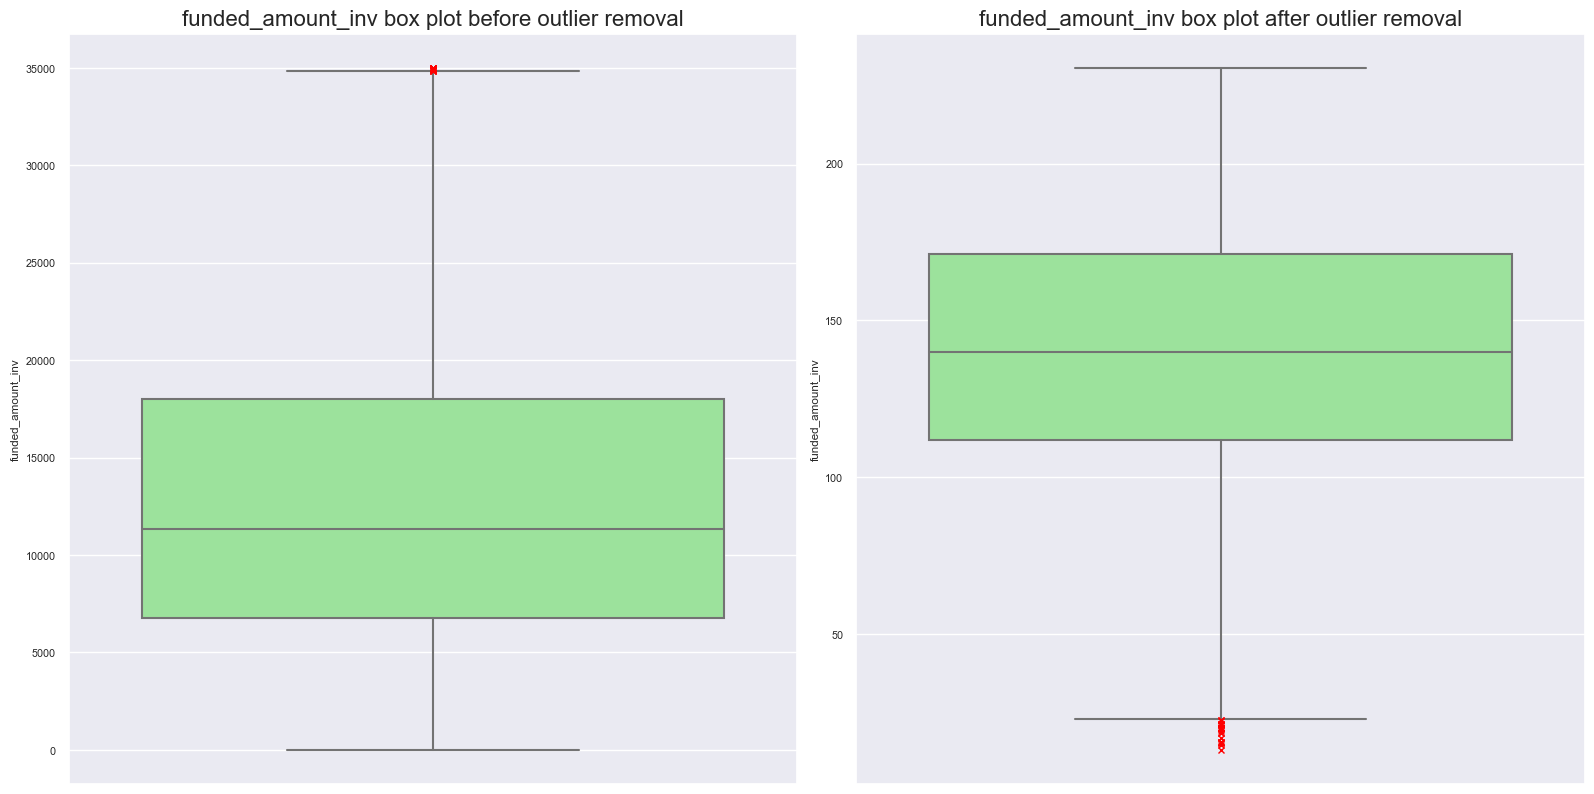

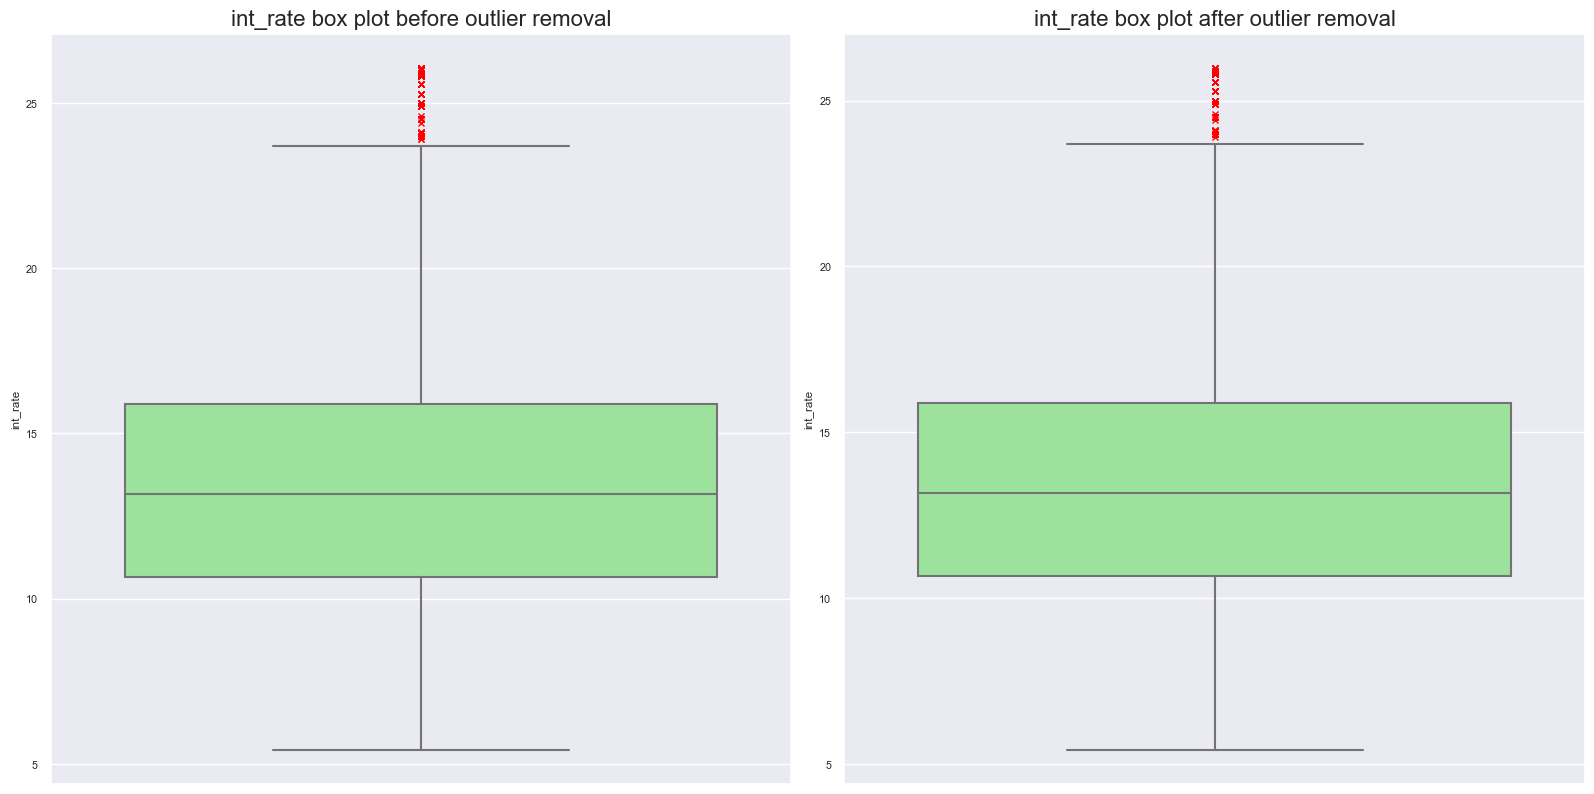

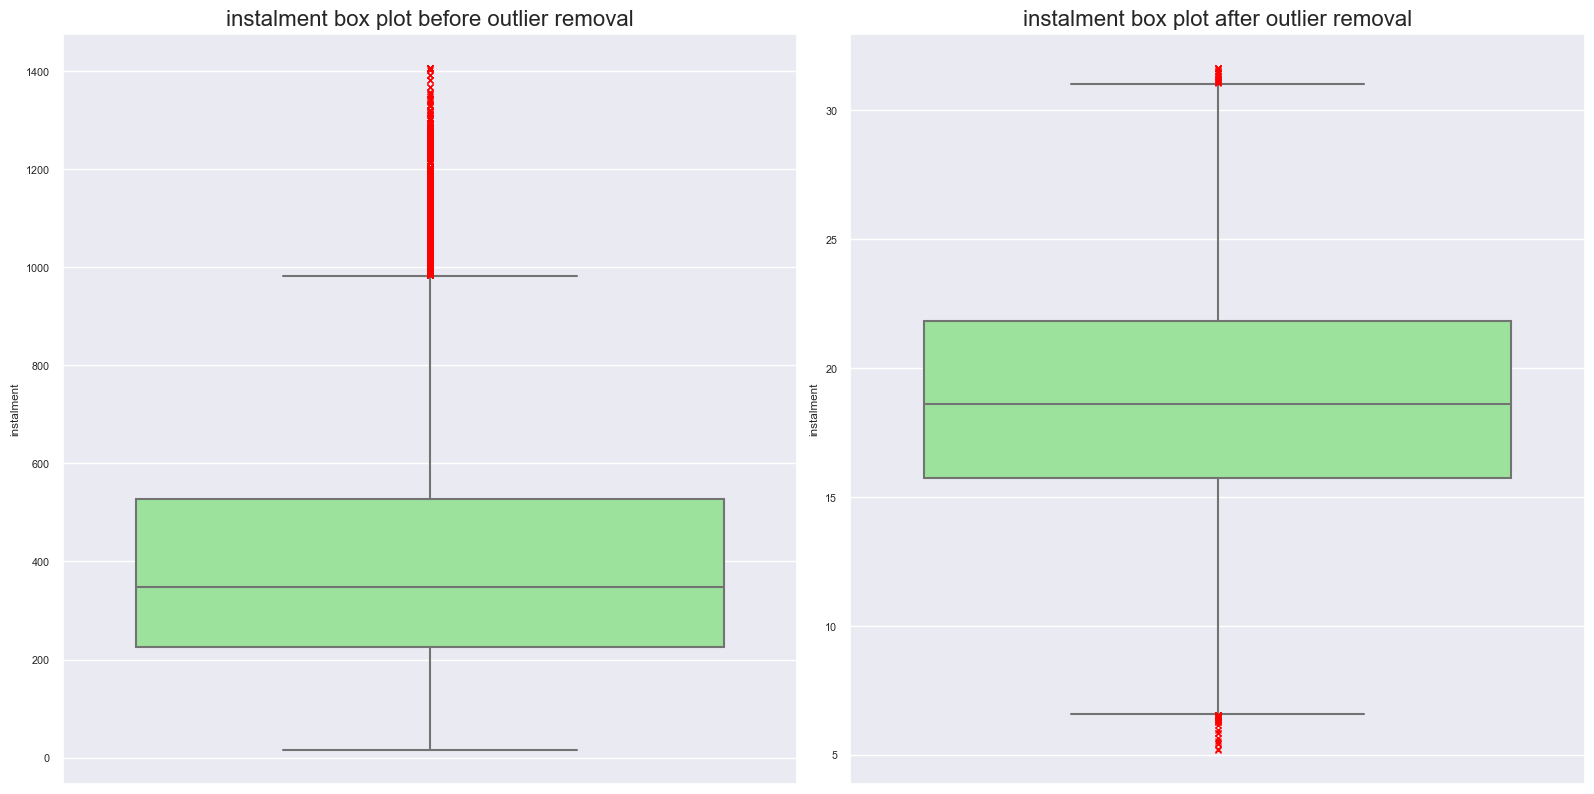

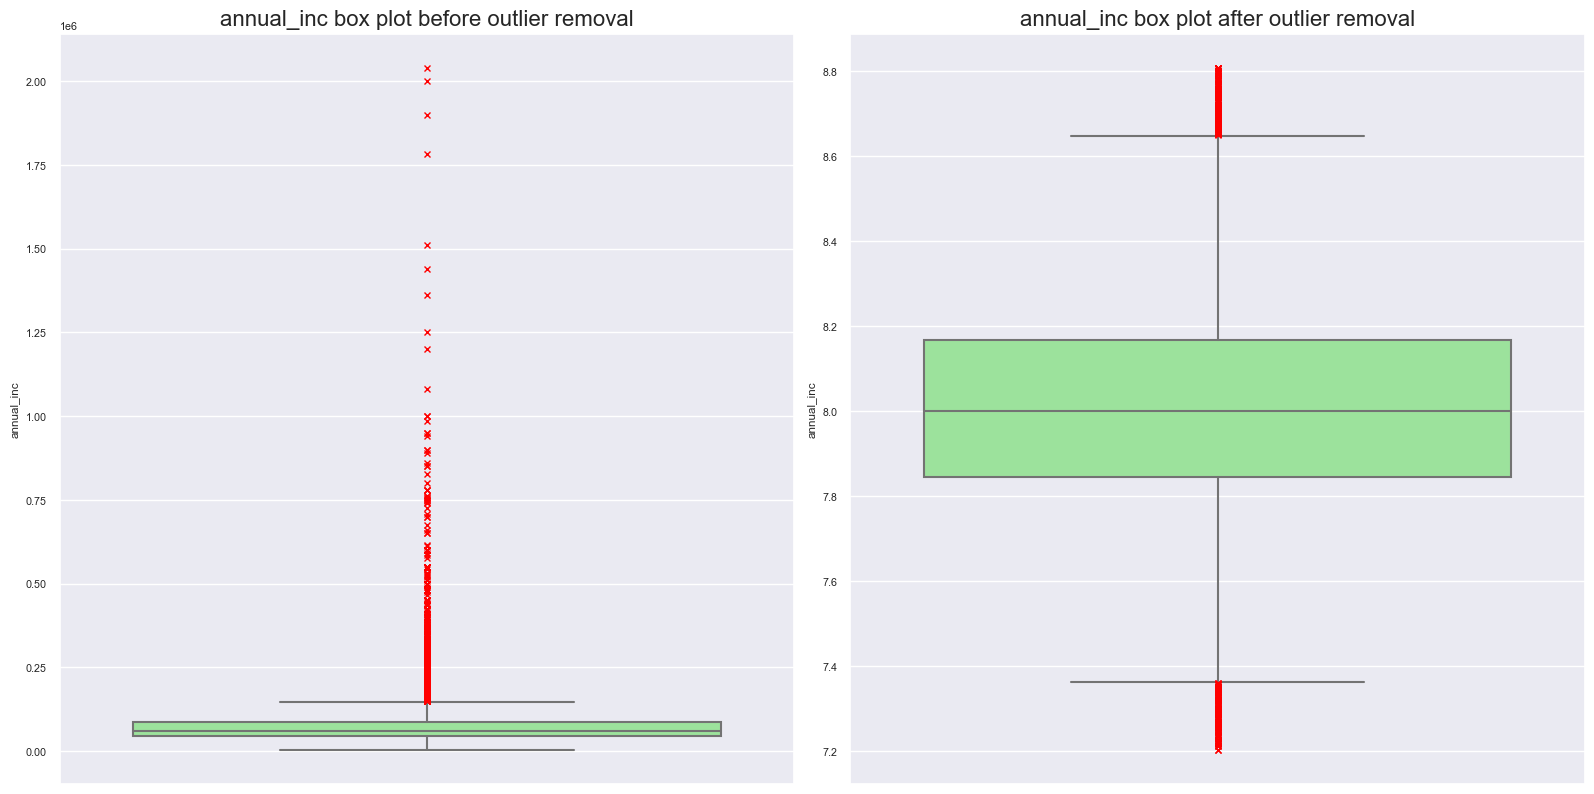

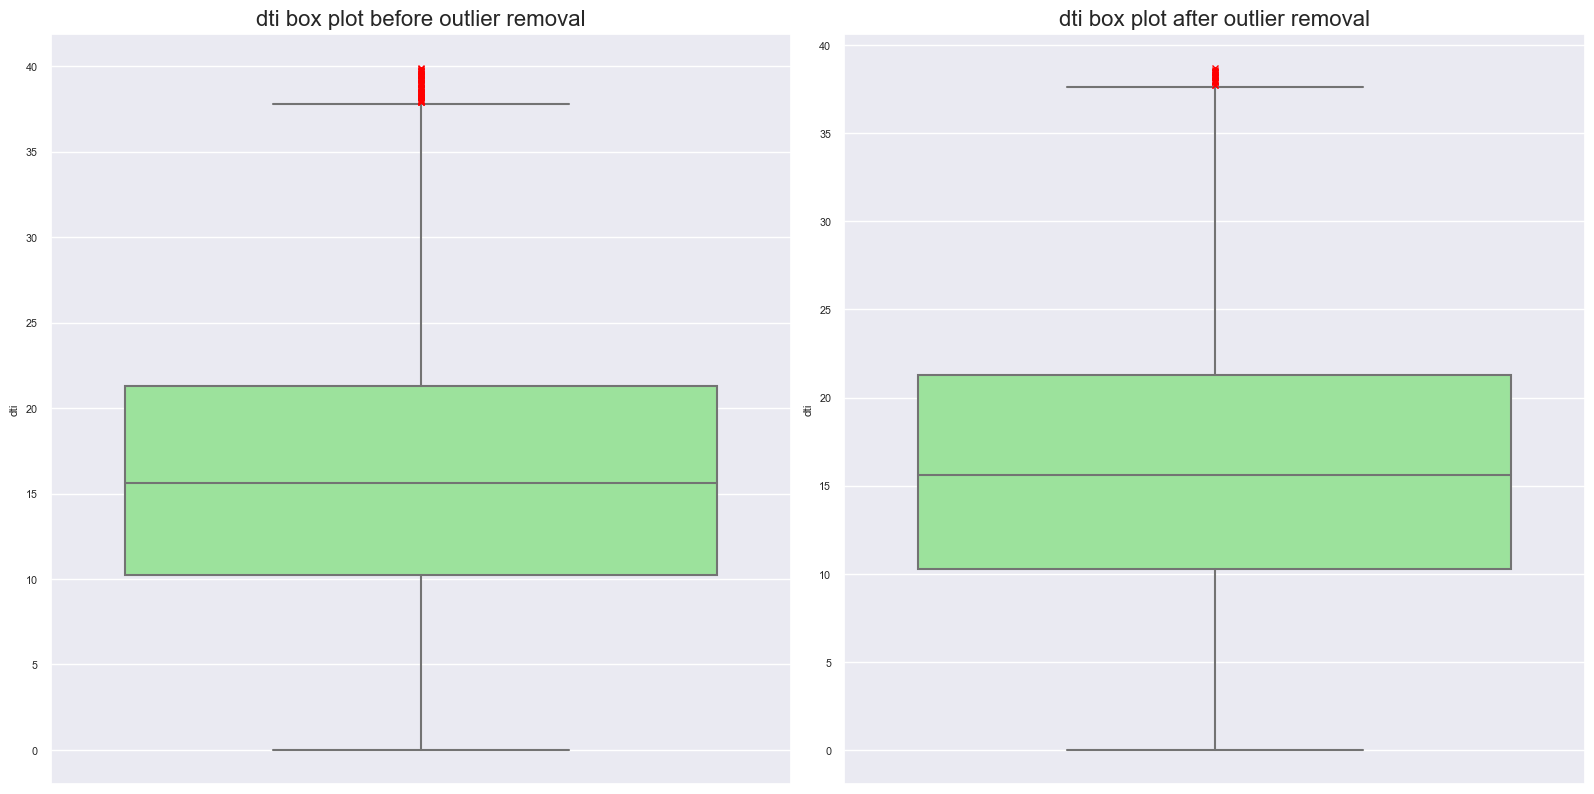

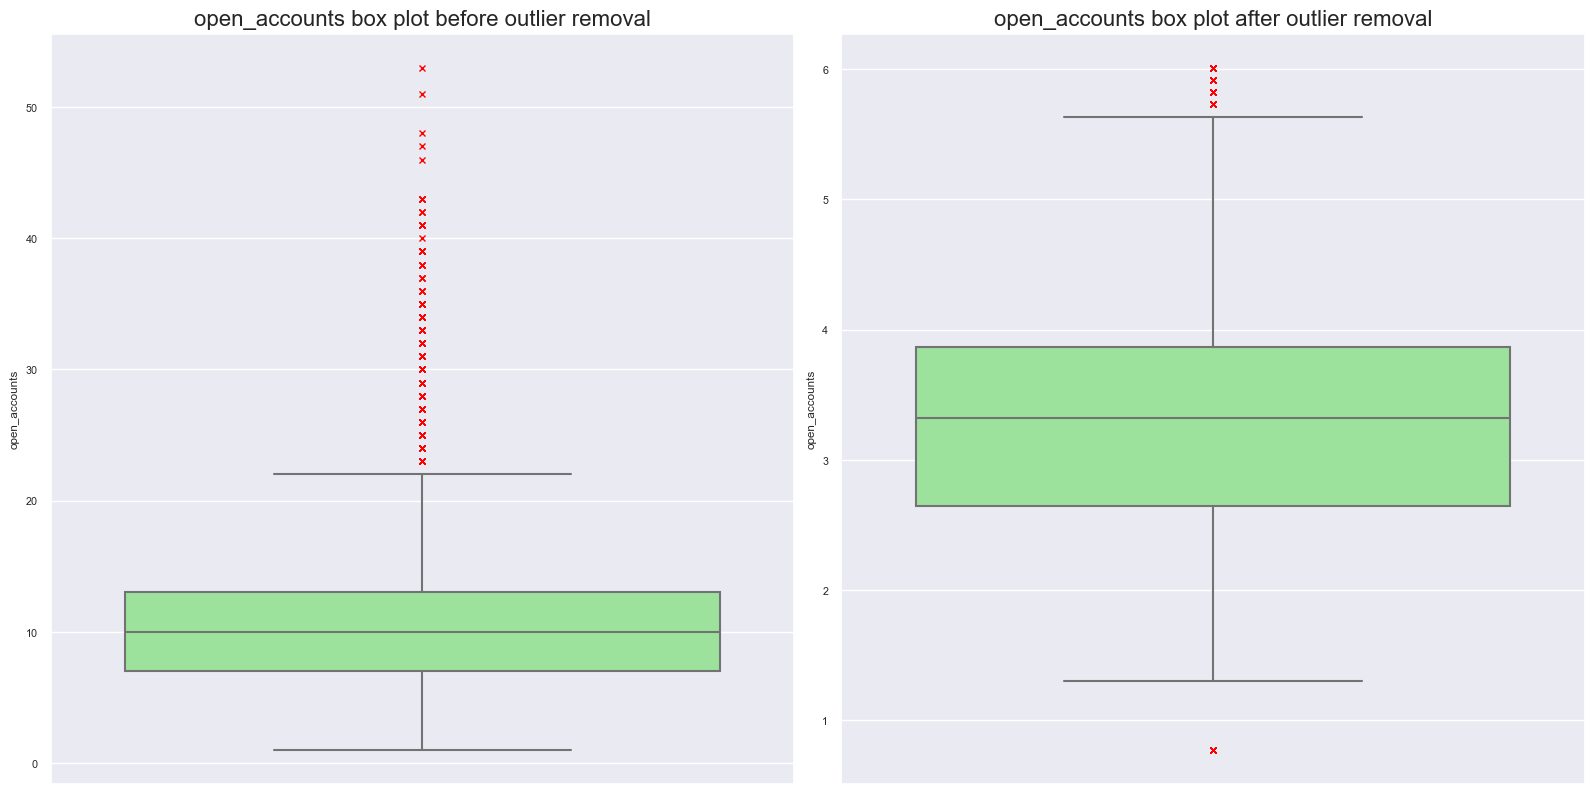

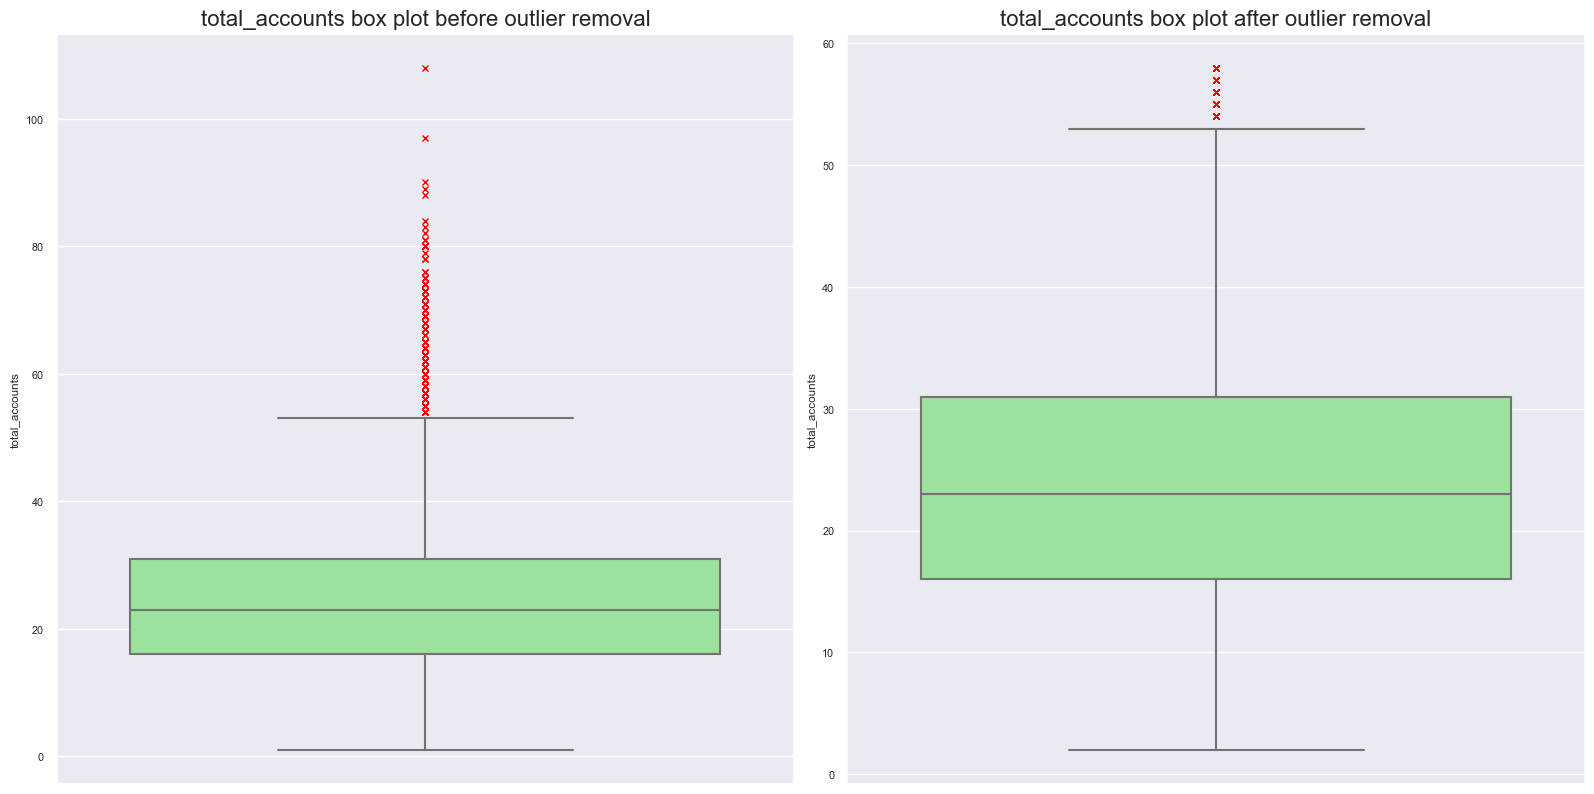

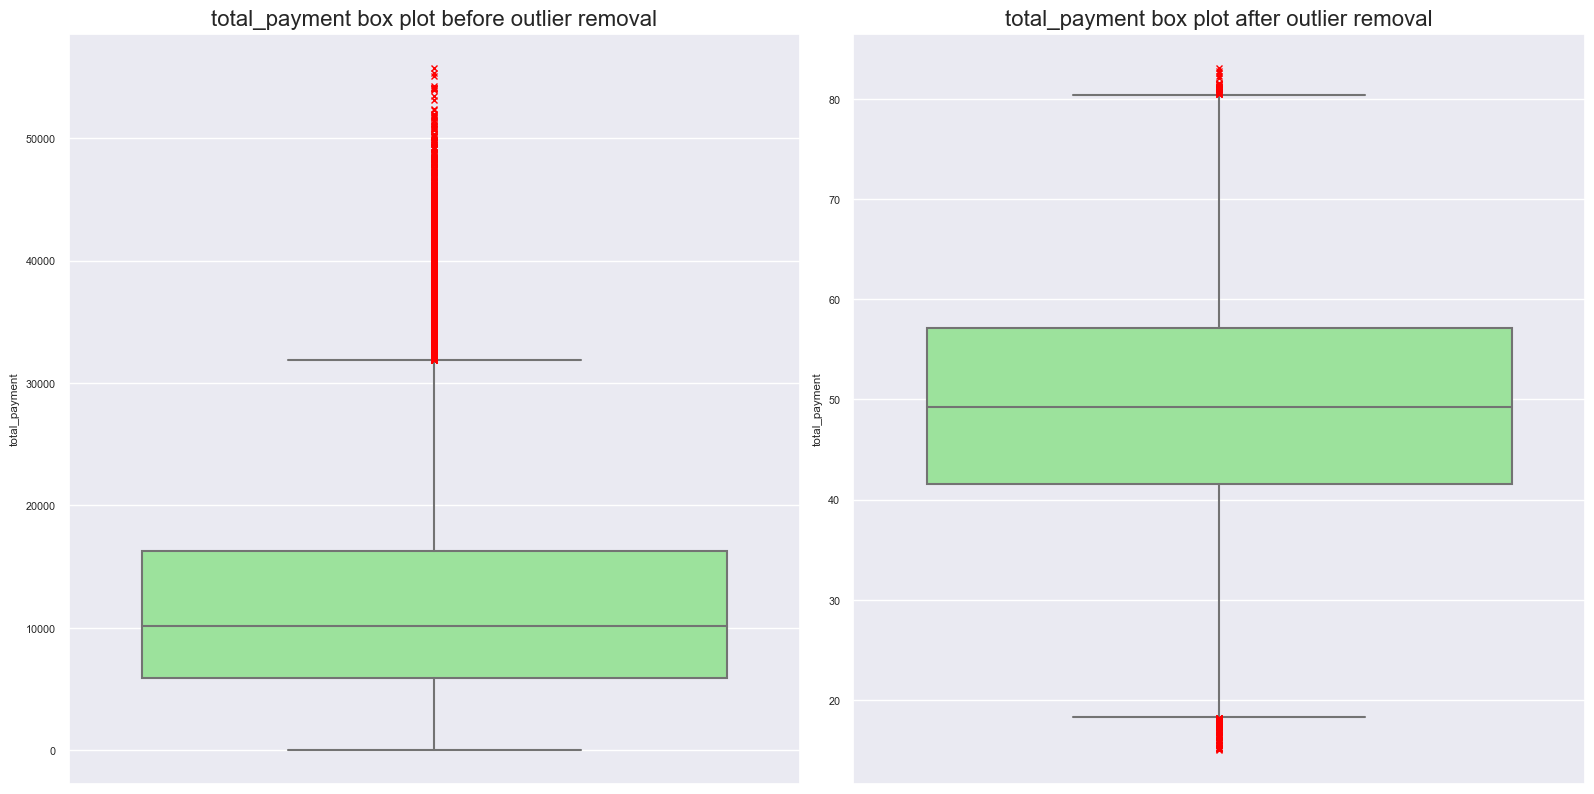

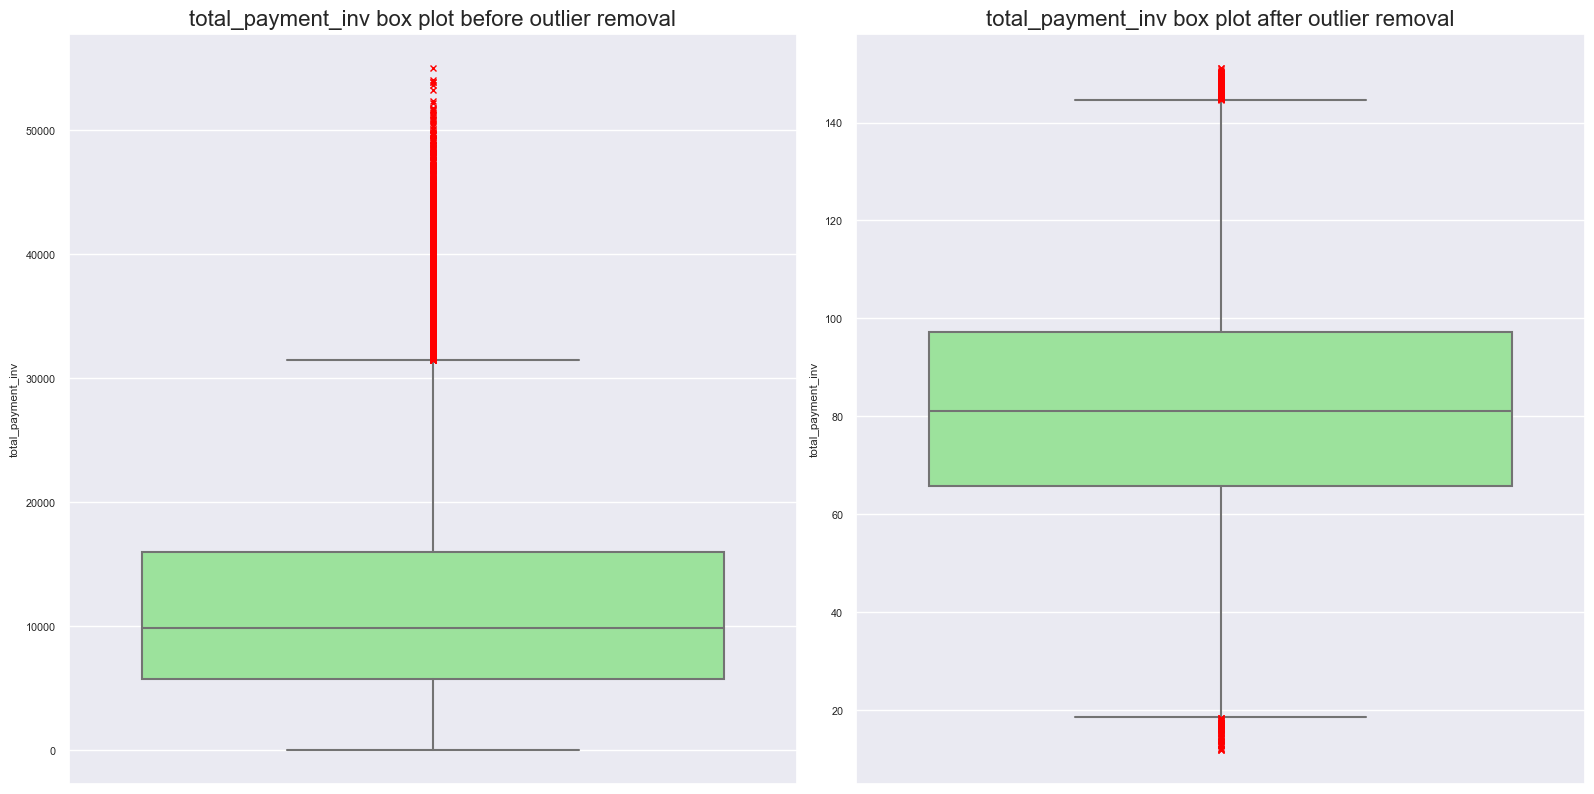

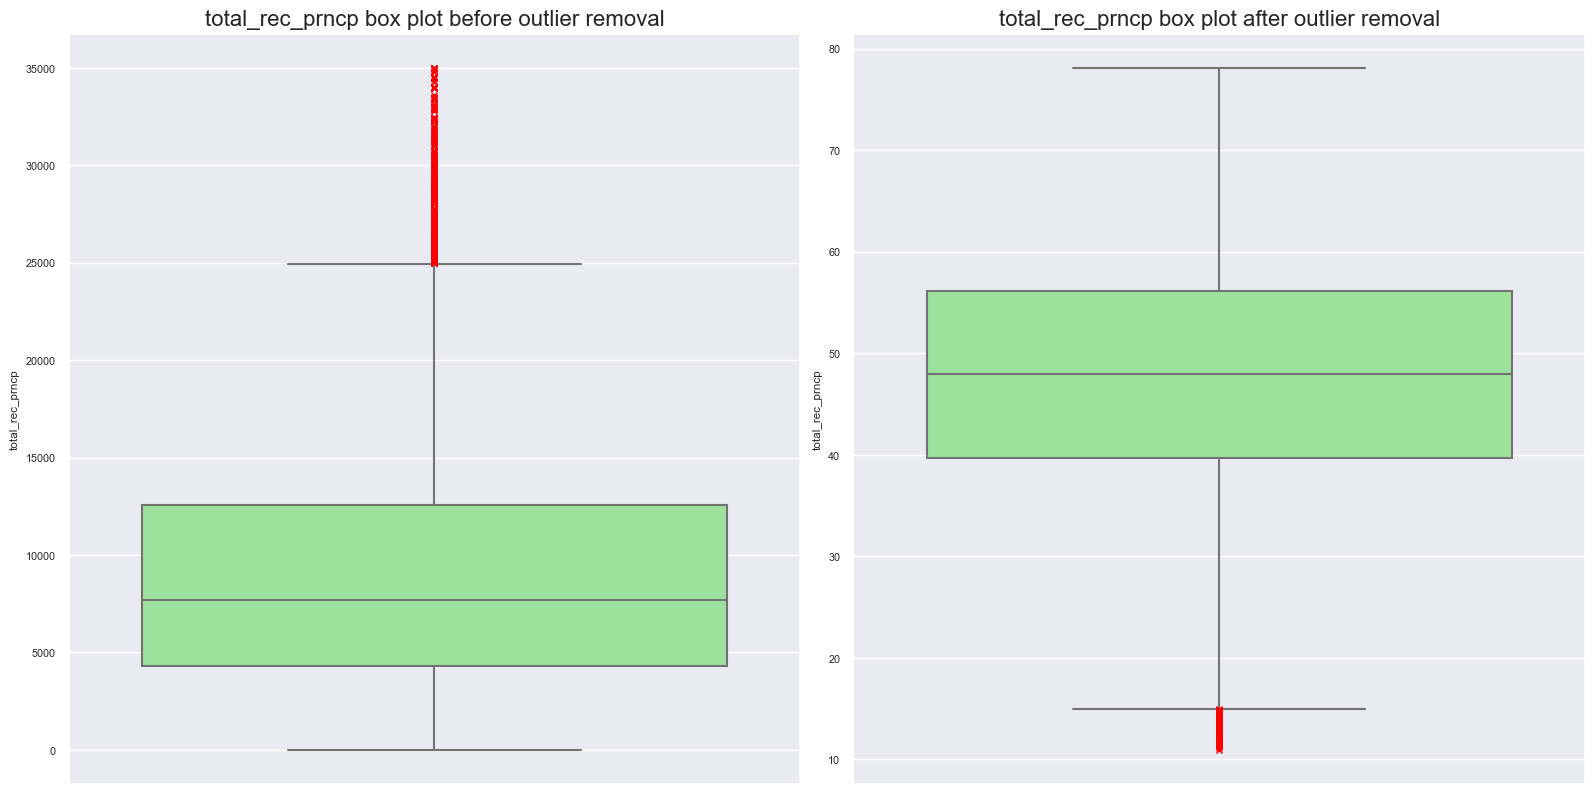

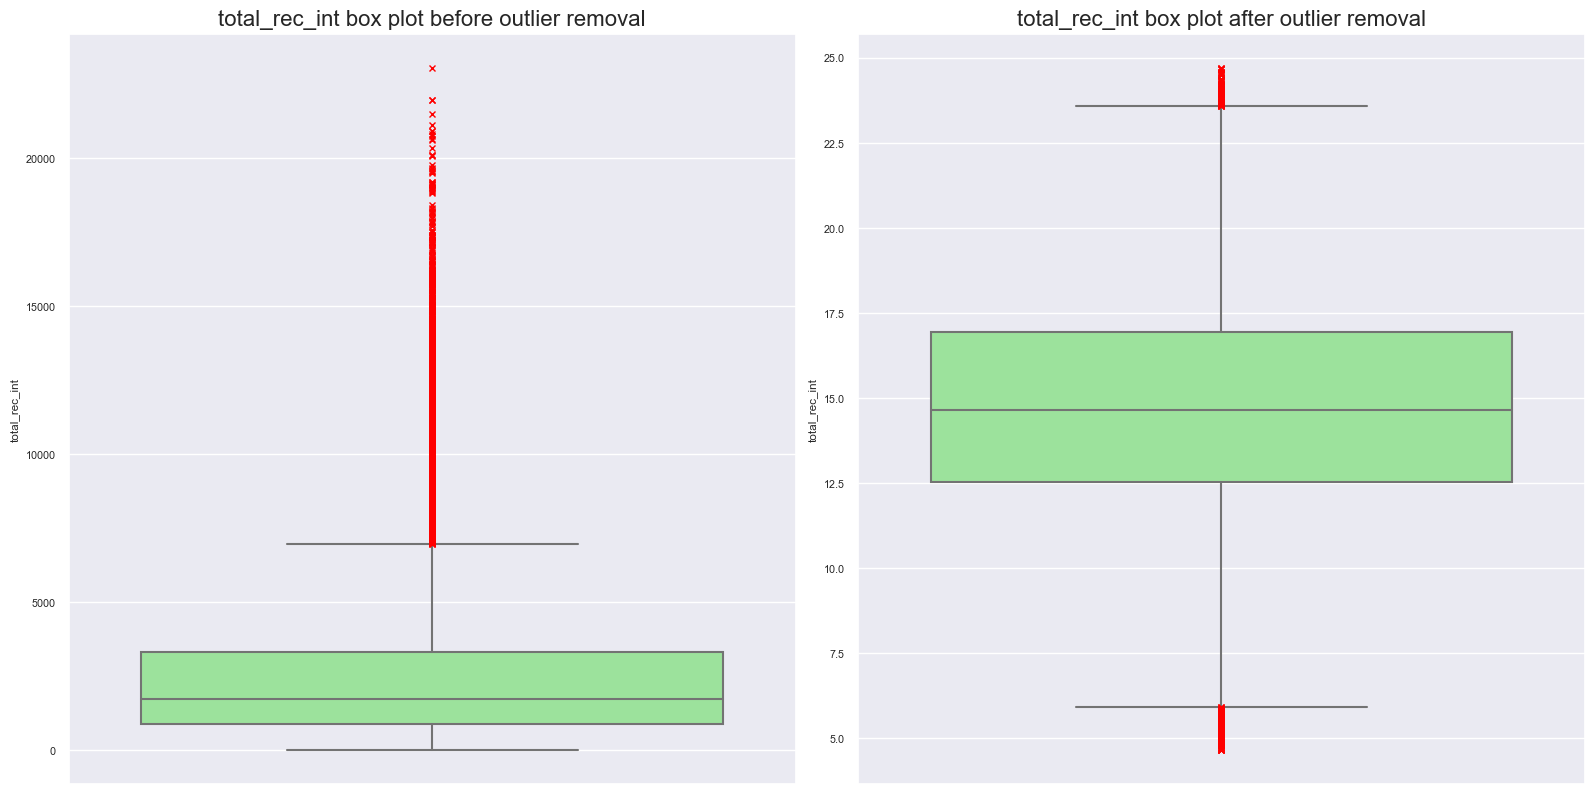

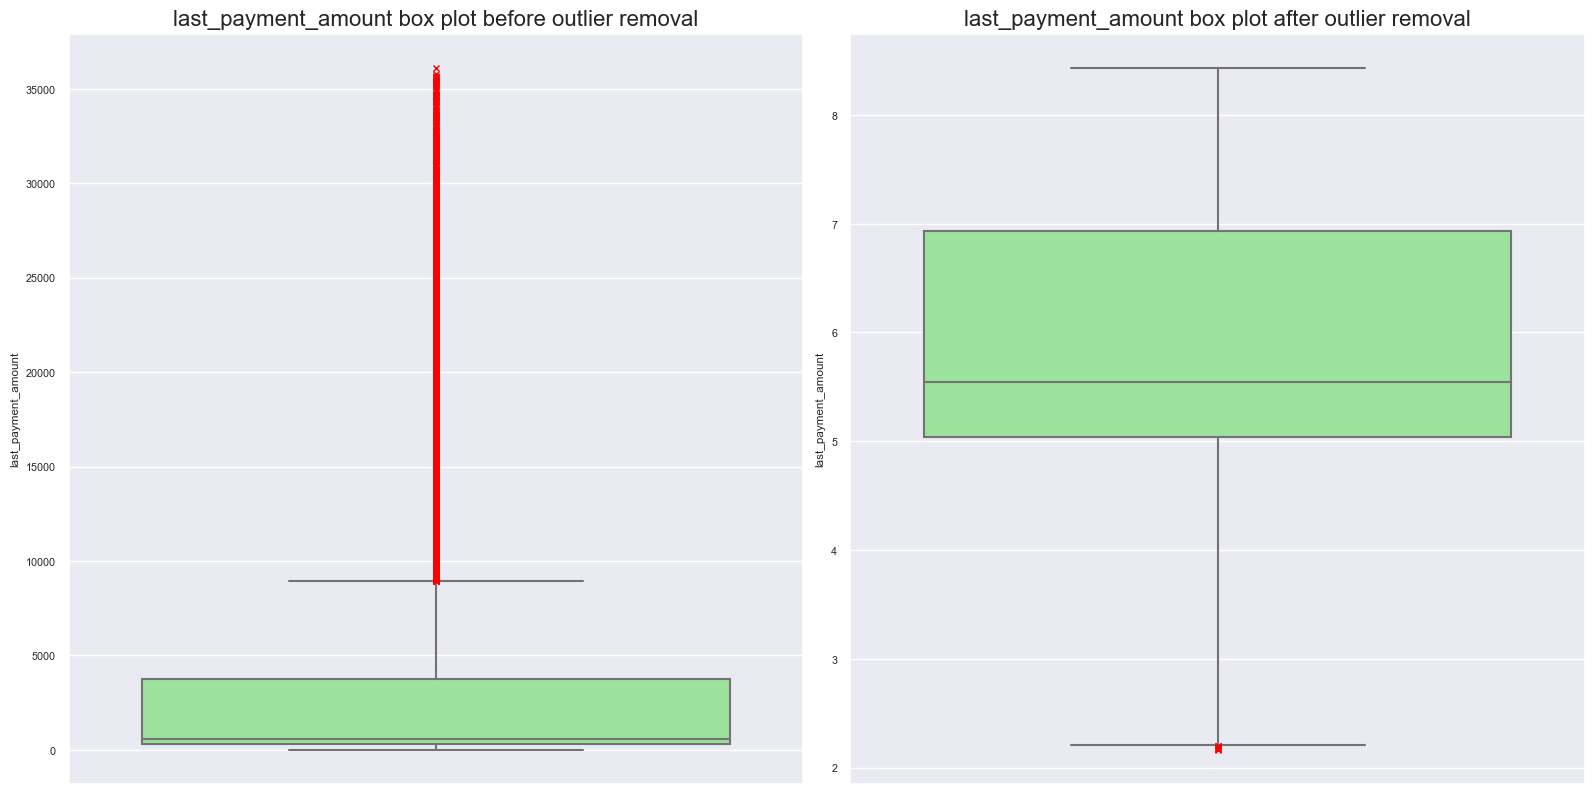

In [64]:
# Create a visual comparison before and after outlier removal

for col_name in col_with_outliers:
    plotter.outlier_boxplot_comparison(df_with_outliers, col_name)

It is clear that the rows with outliers above the z-score threshold have been removed. For columns with a high percentage of outliers, removing the outliers shifted the mean value and position of the quartiles.

### Colinearity 

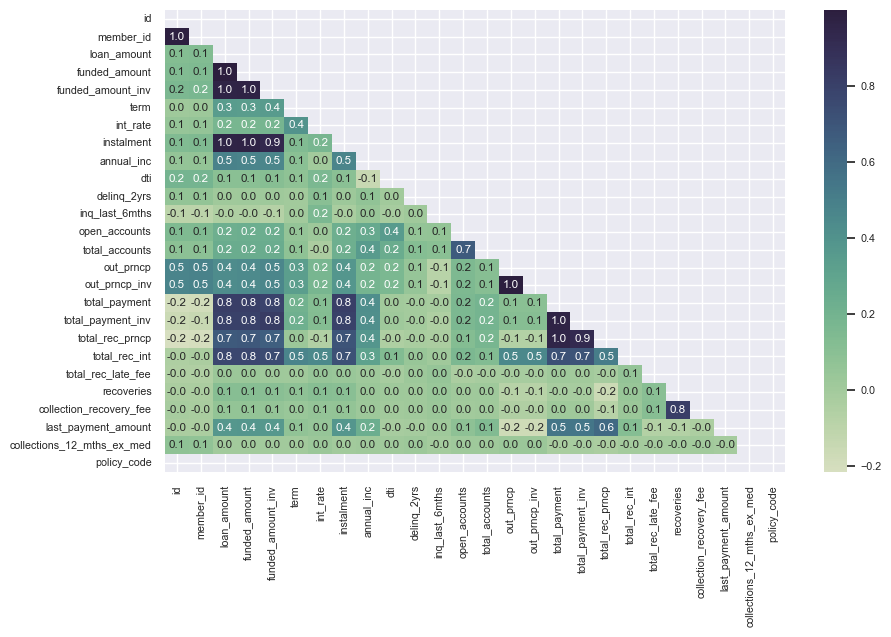

In [65]:
# Correlation of all numerical columns

plotter.check_correlation()

As the columns 'loan_amount', 'funded_amount' and 'funded_amount_inv' are completly correlated and identical in values, the columns 'funded_amount' and 'funded_amount_inv' can be dropped with no information loss.

In [66]:
print(df.shape)
df = dftransform.drop_col(['funded_amount','funded_amount_inv'])
print(df.shape)

(52448, 39)
(52448, 37)
